In [4]:
import pandas as pd
import numpy as np
from IPython.display import Image

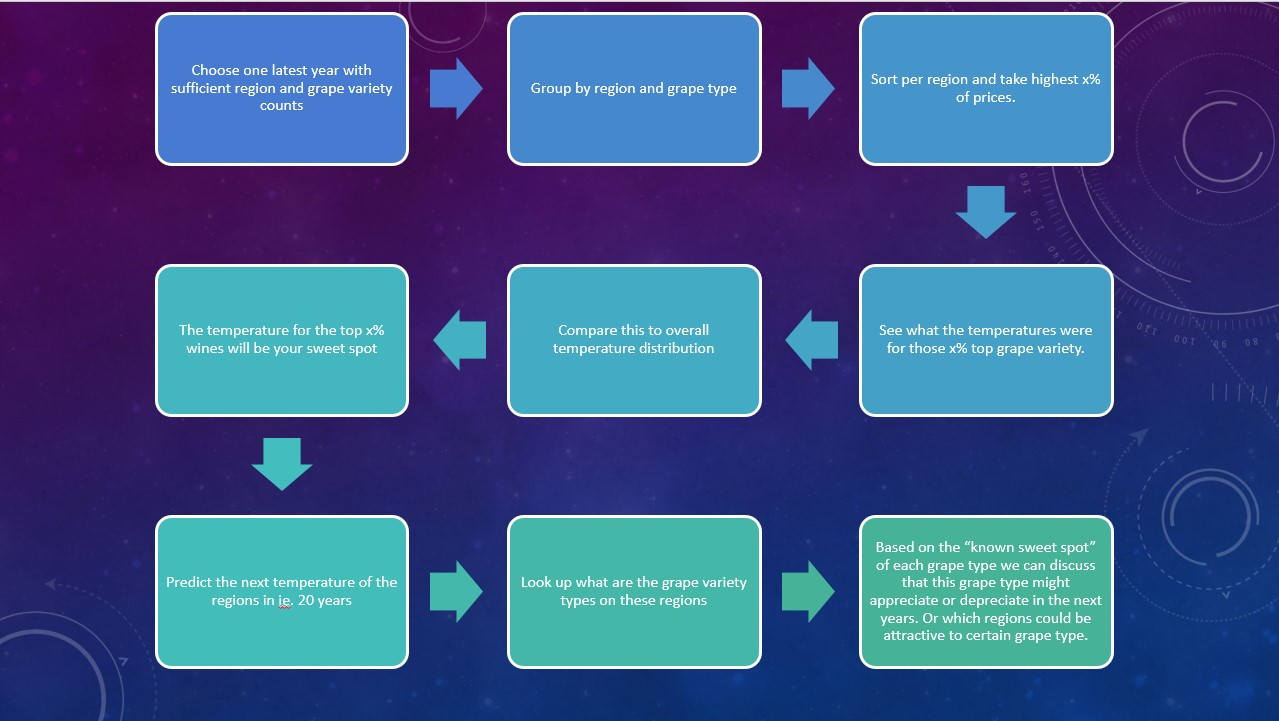

In [5]:
Image(filename = "img/Next step flow.jpg")

In [173]:
df = pd.read_excel("wine_review_2.xlsx")

In [57]:
df.isnull().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
country                      0
description                  0
designation              12044
points                       0
price                        0
province                     0
region_1                     0
region_2                 38459
taster_name               6550
taster_twitter_handle     6550
title                        0
variety                      0
winery                       0
years                        0
dtype: int64

## Step 1: Choose one latest year with sufficient region and grape variety counts

In [76]:
def choose_year(country):
    country = str(country)
    data = df[df['country'] == str(country)]
    data = data.groupby(['years'])['price'].agg(['count','min','max', 'mean']).reset_index()#.set_index('region_1')
    return data

In [79]:
# choosing the year
country_list = ['France','Italy','Spain']
for country in country_list:
    print(country,'\n')
    display(choose_year(country).sort_values('count', ascending = False).head(1))

France 



,years,count,min,max,mean
29,2014,3118,7,2500,40.03143


Italy 



,years,count,min,max,mean
31,2012,2175,6,400,39.368736


Spain 



,years,count,min,max,mean
29,2011,707,7,351,30.618105


## Step 2:  Group by region and grape type 
## Step 3: Sort per region and take highest x% of prices

 1. Filter the low count regions
 2. sort price per region 
 3. get the top 50% of the highest price ('we will consider this as sweet spot')


In [180]:
def filter_year(df, country, year, percent, limit):
    final_df = df
    country = str(country)
    data = final_df[(final_df['country'] == str(country)) & (final_df['years'] == year)]
    data = data.groupby(['region_1','variety','years'])['price'].agg(['count','min','max', 'mean','median']).reset_index()
    data_filtered = data[data['count'] > limit]
    result = (data_filtered.groupby('region_1',group_keys=False).apply(lambda x: x.nlargest(round(len(x) * percent), 'mean')))
    return result

### Step 2 and Step 3 applied to France

In [187]:
country = 'France'
year = 2014
a = 0.50001
france_regions = filter_year(df,country,year,a,5)

### Step 2 and Step 3 applied to Spain

In [189]:
country = 'Spain'
year = 2011
a = 0.50001
spain_regions = filter_year(df,country,year,a,5)

### Step 2 and Step 3 applied to Italy

In [191]:
country = 'Italy'
year = 2012
a = 0.50001
italy_regions = filter_year(df,country,year,a,5)
italy_regions

,region_1,variety,years,count,min,max,mean,median
1,Aglianico del Vulture,Aglianico,2012,10,17,35,25.800000,26.5
6,Alto Adige,Gewürztraminer,2012,10,25,48,32.700000,30.5
8,Alto Adige,Lagrein,2012,11,20,48,32.636364,28.0
13,Alto Adige,Pinot Nero,2012,19,20,45,32.473684,34.0
26,Amarone della Valpolicella,Red Blend,2012,20,37,90,52.200000,48.5
27,Amarone della Valpolicella Classico,Red Blend,2012,17,30,152,66.882353,65.0
28,Barbaresco,Nebbiolo,2012,106,19,235,53.698113,46.0
29,Barbera d'Alba,Barbera,2012,18,15,50,26.388889,23.5
30,Barbera d'Alba Superiore,Barbera,2012,9,17,35,27.777778,30.0
31,Barbera d'Asti,Barbera,2012,10,12,85,35.800000,29.0


# Step 4: See what the temperatures were for those x% top grape variety

In [312]:
# check the temperature data and what's the annual temperature of these regions. 
path = r"C:\Users\rezan\Documents\Master in Applied Data Science\2nd Year\MASTER THESIS\GIT THESIS\geopy\france_cleaned"

class Sweetspot_temp:
    
    def func(self, country_regions, path):
        # get the list of the regions in each country
        regions = country_regions['region_1'].unique()
        print(f'There are {len(regions)} regions.')
        all_files = []
        for subdir, dirs, files in os.walk(path):
            for file in files: 
                all_files.append(file.split('.')[0])
        # for each region find it in local drive
        region_not_found = []
        for region in regions:
            paths = path +'\\'+ str(region)+'.csv'
            # check if the region temperature is downloaded
            if region in all_files:
                df = pd.read_csv(paths, sep=',')
                display(df)
            else: 
                region_not_found.append(region)
                
        self.region_not_found = region_not_found

In [313]:
sw = Sweetspot_temp()
sw.func(france_regions, path)

There are 96 regions.


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,48.24919,7.40748,T2M,1981,-2.68,-1.23,6.74,8.99,12.46,15.47,16.75,17.32,14.64,8.35,3.39,-0.91,8.33
1,48.24919,7.40748,T2M,1982,-0.61,0.95,3.73,6.58,12.78,16.68,19.17,16.91,16.22,9.05,5.41,1.32,9.06
2,48.24919,7.40748,T2M,1983,1.79,-2.17,4.25,8.29,10.53,16.74,20.92,18.27,13.86,8.93,2.99,-0.13,8.76
3,48.24919,7.40748,T2M,1984,-0.37,-0.78,2.22,6.77,9.87,14.59,17.00,17.36,12.68,9.80,6.00,0.88,8.03
4,48.24919,7.40748,T2M,1985,-6.54,-1.17,2.45,7.77,12.96,14.06,18.40,17.03,15.13,9.23,0.37,1.68,7.67
5,48.24919,7.40748,T2M,1986,-0.36,-5.99,2.90,5.92,14.18,16.53,17.68,17.02,13.10,10.67,4.91,0.91,8.22
6,48.24919,7.40748,T2M,1987,-5.59,0.23,0.86,9.36,10.07,14.57,17.91,17.06,16.35,10.22,3.94,0.87,8.02
7,48.24919,7.40748,T2M,1988,3.20,1.25,3.28,8.99,14.39,15.86,17.42,18.13,13.66,10.40,2.66,2.06,9.31
8,48.24919,7.40748,T2M,1989,0.89,2.59,7.43,7.04,14.32,15.58,18.74,18.28,14.72,10.53,2.59,1.92,9.61
9,48.24919,7.40748,T2M,1990,0.78,5.58,6.54,7.04,14.83,15.97,18.78,20.09,13.55,11.36,3.60,-1.67,9.73


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.34621,4.8815,T2M,1981,-1.36,-0.40,7.00,9.41,11.69,15.44,17.17,18.52,15.71,9.97,4.03,1.31,9.10
1,45.34621,4.8815,T2M,1982,3.27,2.81,3.88,7.25,13.11,17.59,21.34,17.99,16.95,9.73,6.26,1.63,10.19
2,45.34621,4.8815,T2M,1983,2.19,-0.80,4.84,8.01,11.24,16.52,22.26,19.11,15.89,10.13,5.39,1.69,9.77
3,45.34621,4.8815,T2M,1984,0.95,0.34,3.09,7.59,9.71,15.36,19.34,18.12,13.79,10.08,7.52,2.09,9.02
4,45.34621,4.8815,T2M,1985,-4.77,2.35,2.79,8.33,11.51,15.06,19.76,18.47,17.52,11.59,1.45,2.64,8.93
5,45.34621,4.8815,T2M,1986,0.25,-2.18,4.21,6.11,14.18,16.89,19.75,19.56,16.04,12.25,5.82,1.63,9.62
6,45.34621,4.8815,T2M,1987,-4.17,1.30,3.03,9.48,10.73,15.18,19.35,19.71,18.66,11.92,4.79,3.18,9.47
7,45.34621,4.8815,T2M,1988,3.88,2.04,3.95,9.42,13.50,15.76,18.68,19.81,15.27,11.92,3.71,1.88,10.02
8,45.34621,4.8815,T2M,1989,1.91,3.65,7.24,7.36,14.66,16.76,21.20,20.53,16.02,11.11,5.13,3.49,10.81
9,45.34621,4.8815,T2M,1990,2.15,6.85,6.94,7.47,16.11,17.43,21.41,21.42,15.65,12.64,4.65,-1.16,10.99


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.13578,5.75237,T2M,1981,5.52,6.28,10.39,12.96,15.32,20.51,21.68,23.48,20.23,15.07,10.68,7.57,14.18
1,43.13578,5.75237,T2M,1982,8.47,7.77,8.90,12.01,16.34,20.73,25.11,22.44,20.78,14.88,11.87,8.44,14.85
2,43.13578,5.75237,T2M,1983,7.87,5.80,9.74,11.60,14.61,20.05,25.25,22.82,19.87,15.83,11.78,8.20,14.51
3,43.13578,5.75237,T2M,1984,6.56,6.28,8.28,11.72,13.21,18.35,22.60,21.87,17.44,15.04,12.31,8.61,13.55
4,43.13578,5.75237,T2M,1985,3.30,8.49,8.16,12.17,14.47,19.03,23.92,22.07,21.41,16.88,8.80,9.27,14.03
5,43.13578,5.75237,T2M,1986,6.06,5.05,8.94,10.71,17.35,19.82,23.26,23.16,20.07,16.52,11.87,7.48,14.25
6,43.13578,5.75237,T2M,1987,5.05,7.15,7.89,12.48,14.60,18.95,23.41,23.46,22.08,16.32,10.67,9.48,14.34
7,43.13578,5.75237,T2M,1988,8.69,7.52,8.89,12.22,16.31,19.50,23.38,23.59,19.51,16.72,10.58,7.96,14.60
8,43.13578,5.75237,T2M,1989,7.94,8.88,11.45,11.38,17.61,20.22,24.23,23.72,19.51,15.55,10.94,9.36,15.11
9,43.13578,5.75237,T2M,1990,8.02,10.56,11.25,12.15,17.92,20.08,23.29,23.56,19.85,16.86,10.31,6.49,15.06


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,29.78577,-90.76814,T2M,1981,8.97,12.35,15.76,22.39,23.52,27.78,28.57,28.47,25.40,22.16,18.68,12.75,20.60
1,29.78577,-90.76814,T2M,1982,12.14,13.15,18.03,20.28,24.39,28.27,28.28,28.05,25.04,21.08,17.17,14.94,20.95
2,29.78577,-90.76814,T2M,1983,10.16,11.95,14.00,17.84,23.27,25.78,27.67,27.76,24.40,20.80,16.29,10.19,19.22
3,29.78577,-90.76814,T2M,1984,8.50,12.07,15.48,19.67,23.76,26.25,26.91,26.73,24.70,23.32,15.16,16.63,19.96
4,29.78577,-90.76814,T2M,1985,8.27,11.30,18.47,20.53,24.32,26.62,26.91,27.73,25.21,22.55,19.27,10.46,20.18
5,29.78577,-90.76814,T2M,1986,10.54,14.51,16.14,19.70,24.45,27.61,28.10,27.47,27.30,21.65,18.83,11.63,20.68
6,29.78577,-90.76814,T2M,1987,9.72,13.40,15.03,18.35,24.56,26.25,27.62,28.00,25.54,18.30,15.87,14.42,19.79
7,29.78577,-90.76814,T2M,1988,9.32,11.50,15.67,19.79,23.05,25.76,27.22,27.57,25.73,20.03,18.24,13.48,19.80
8,29.78577,-90.76814,T2M,1989,15.45,13.30,16.57,19.88,24.72,26.41,27.17,27.43,25.15,20.13,16.96,8.11,20.14
9,29.78577,-90.76814,T2M,1990,13.53,15.41,16.90,19.64,24.05,27.74,27.61,28.28,26.46,20.51,17.36,14.44,21.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.05126,4.54018,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.05126,4.54018,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.05126,4.54018,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.05126,4.54018,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.05126,4.54018,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.05126,4.54018,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.05126,4.54018,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.05126,4.54018,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.05126,4.54018,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.05126,4.54018,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.12518,4.73785,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.12518,4.73785,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.12518,4.73785,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.12518,4.73785,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.12518,4.73785,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.12518,4.73785,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.12518,4.73785,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.12518,4.73785,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.12518,4.73785,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.12518,4.73785,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.02392,4.83805,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.02392,4.83805,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.02392,4.83805,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.02392,4.83805,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.02392,4.83805,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.02392,4.83805,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.02392,4.83805,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.02392,4.83805,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.02392,4.83805,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.02392,4.83805,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.84124,-0.58003,T2M,1981,5.79,4.82,10.75,11.99,13.90,17.64,19.23,21.19,18.31,13.97,8.94,7.85,12.92
1,44.84124,-0.58003,T2M,1982,8.43,7.53,8.26,11.07,14.61,18.76,21.38,19.08,19.16,13.25,10.32,7.09,13.27
2,44.84124,-0.58003,T2M,1983,6.09,4.99,8.52,10.58,12.91,18.40,22.81,20.12,18.28,14.03,10.43,5.87,12.80
3,44.84124,-0.58003,T2M,1984,6.92,4.93,6.67,11.92,11.88,17.58,20.49,19.88,16.48,13.60,11.19,6.35,12.34
4,44.84124,-0.58003,T2M,1985,1.30,7.66,7.12,11.69,13.46,17.20,20.77,18.71,19.55,14.97,5.96,6.37,12.08
5,44.84124,-0.58003,T2M,1986,6.67,2.96,8.27,8.10,14.83,18.09,20.49,19.19,17.86,15.65,9.42,7.51,12.49
6,44.84124,-0.58003,T2M,1987,1.42,5.73,7.94,13.02,13.85,17.12,21.05,21.36,20.67,14.89,9.30,7.36,12.84
7,44.84124,-0.58003,T2M,1988,9.19,7.16,8.23,12.66,15.47,18.22,19.06,20.10,17.83,15.21,9.13,6.49,13.25
8,44.84124,-0.58003,T2M,1989,5.09,7.79,10.94,10.07,18.04,20.26,22.73,21.72,18.69,15.28,10.61,9.45,14.27
9,44.84124,-0.58003,T2M,1990,7.28,11.33,10.29,11.45,18.50,18.80,22.94,23.43,19.55,15.78,9.49,3.96,14.42


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,29.78343,-98.25444,T2M,1981,9.01,11.59,14.82,21.84,23.65,25.73,27.24,28.69,25.10,20.61,15.60,10.58,19.58
1,29.78343,-98.25444,T2M,1982,9.68,9.71,17.64,20.28,23.21,28.01,30.65,30.03,26.67,20.37,14.46,9.62,20.09
2,29.78343,-98.25444,T2M,1983,8.24,10.36,14.08,18.54,23.86,26.25,27.72,28.21,25.36,21.09,16.12,5.70,18.83
3,29.78343,-98.25444,T2M,1984,6.63,11.94,16.84,21.87,25.29,28.42,29.60,29.35,25.04,21.33,13.40,14.38,20.37
4,29.78343,-98.25444,T2M,1985,5.04,9.26,16.67,20.23,24.34,26.20,27.31,30.96,25.94,20.53,16.70,7.58,19.28
5,29.78343,-98.25444,T2M,1986,9.58,12.72,16.54,22.89,23.40,25.98,29.57,29.22,25.94,19.33,13.31,8.44,19.78
6,29.78343,-98.25444,T2M,1987,8.16,11.23,13.02,18.68,23.65,24.86,26.61,29.27,25.46,21.00,14.78,10.69,18.99
7,29.78343,-98.25444,T2M,1988,6.83,10.76,15.54,20.51,23.93,27.06,28.10,29.88,27.11,21.95,17.59,12.04,20.13
8,29.78343,-98.25444,T2M,1989,12.13,9.66,15.03,20.49,26.32,27.75,29.88,29.03,25.29,20.48,14.66,5.13,19.71
9,29.78343,-98.25444,T2M,1990,12.16,14.06,16.06,20.15,24.59,30.65,27.12,27.72,25.63,19.66,15.99,10.58,20.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.73382,-0.42696,T2M,1981,4.71,3.95,10.44,11.74,13.61,17.55,19.16,21.27,18.17,13.24,7.96,6.69,12.43
1,44.73382,-0.42696,T2M,1982,7.65,6.89,7.55,10.71,14.51,18.89,21.90,19.20,19.25,12.59,9.54,6.08,12.93
2,44.73382,-0.42696,T2M,1983,5.09,4.26,7.96,10.28,12.73,18.44,23.12,20.31,18.26,13.63,9.97,4.90,12.46
3,44.73382,-0.42696,T2M,1984,5.86,4.16,6.13,11.46,11.72,17.72,21.05,20.09,16.21,13.05,10.57,5.20,11.95
4,44.73382,-0.42696,T2M,1985,-0.03,7.11,6.38,11.40,13.39,17.11,21.06,19.05,20.07,14.98,4.93,5.40,11.76
5,44.73382,-0.42696,T2M,1986,5.59,2.13,7.63,7.69,14.96,18.35,21.22,19.80,18.24,15.40,8.55,6.44,12.24
6,44.73382,-0.42696,T2M,1987,0.35,5.10,7.39,12.81,13.83,17.44,21.53,21.89,20.91,14.59,8.36,6.50,12.59
7,44.73382,-0.42696,T2M,1988,8.28,6.30,7.65,12.48,15.41,18.13,19.16,20.50,17.89,14.94,8.40,5.65,12.92
8,44.73382,-0.42696,T2M,1989,4.27,7.04,10.47,9.74,17.91,20.49,23.40,22.24,18.83,15.11,9.99,8.69,14.06
9,44.73382,-0.42696,T2M,1990,6.15,10.67,9.78,11.16,18.76,19.35,23.92,24.29,19.66,15.54,8.73,2.82,14.26


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,50.64439,3.0139,T2M,1981,3.21,1.57,8.17,8.56,12.57,14.31,16.42,16.88,14.78,9.03,6.63,0.44,9.43
1,50.64439,3.0139,T2M,1982,0.60,2.89,5.22,7.52,12.58,16.31,18.09,16.81,16.01,10.44,7.61,3.01,9.79
2,50.64439,3.0139,T2M,1983,5.34,0.22,5.56,8.10,10.57,15.54,19.63,17.86,14.33,10.72,5.89,3.31,9.82
3,50.64439,3.0139,T2M,1984,3.25,2.17,4.17,7.60,10.20,14.29,16.44,17.55,13.64,11.18,8.42,3.82,9.42
4,50.64439,3.0139,T2M,1985,-2.69,-1.13,3.68,8.51,12.53,13.94,17.22,15.94,14.79,10.37,2.57,4.87,8.44
5,50.64439,3.0139,T2M,1986,2.26,-3.62,3.78,5.87,12.49,16.20,16.91,15.46,12.00,11.86,7.26,4.41,8.82
6,50.64439,3.0139,T2M,1987,-2.80,1.53,2.79,10.17,10.26,14.27,16.90,16.50,15.47,11.06,5.89,3.17,8.80
7,50.64439,3.0139,T2M,1988,5.53,4.05,5.65,8.47,13.35,14.58,16.07,16.73,14.29,11.10,5.29,6.35,10.15
8,50.64439,3.0139,T2M,1989,3.77,4.85,8.07,7.06,14.08,15.01,18.21,17.57,15.62,12.32,5.16,4.11,10.53
9,50.64439,3.0139,T2M,1990,4.66,7.20,8.03,8.45,14.01,14.88,17.48,19.44,13.78,12.25,6.23,3.15,10.83


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.2781,4.2225,T2M,1981,-0.53,-0.18,7.30,9.02,11.65,14.64,16.69,17.15,14.54,9.27,4.01,1.48,8.81
1,47.2781,4.2225,T2M,1982,2.79,2.62,3.98,7.03,12.51,16.65,18.91,16.65,16.48,9.49,6.42,2.20,9.68
2,47.2781,4.2225,T2M,1983,2.65,-0.55,4.64,7.68,10.19,16.64,21.00,17.82,14.46,9.39,4.42,1.48,9.21
3,47.2781,4.2225,T2M,1984,1.27,0.38,2.99,7.47,9.41,14.76,17.29,17.21,12.83,9.90,7.66,1.91,8.61
4,47.2781,4.2225,T2M,1985,-5.04,0.67,2.74,8.05,11.71,14.22,18.33,16.26,15.56,10.12,1.03,2.13,8.02
5,47.2781,4.2225,T2M,1986,0.92,-3.77,3.49,5.46,13.19,16.66,17.81,16.62,13.67,11.56,5.60,1.97,8.68
6,47.2781,4.2225,T2M,1987,-4.59,0.81,2.26,9.50,10.33,14.52,17.93,17.17,16.69,11.11,4.57,2.24,8.58
7,47.2781,4.2225,T2M,1988,4.40,2.08,4.03,9.40,13.54,15.65,16.92,17.81,14.00,11.07,3.69,3.25,9.68
8,47.2781,4.2225,T2M,1989,1.30,3.14,7.72,7.05,14.74,15.30,18.73,18.39,14.99,10.90,4.10,2.85,9.98
9,47.2781,4.2225,T2M,1990,1.86,6.57,6.76,7.41,15.08,15.87,19.33,20.66,14.52,12.22,4.74,-0.54,10.40


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.28278,0.1789,T2M,1981,3.61,2.05,9.08,10.09,12.47,15.57,17.88,19.81,16.89,11.26,6.63,4.48,10.87
1,47.28278,0.1789,T2M,1982,5.32,5.34,6.32,8.79,13.58,17.96,20.15,18.07,18.05,11.34,8.49,4.92,11.56
2,47.28278,0.1789,T2M,1983,5.27,2.47,7.16,8.71,11.37,17.50,21.70,19.14,16.22,11.50,7.14,3.69,11.04
3,47.28278,0.1789,T2M,1984,4.70,3.24,5.20,9.59,10.61,16.84,19.97,19.31,15.12,11.66,9.35,4.04,10.82
4,47.28278,0.1789,T2M,1985,-1.09,3.17,4.94,9.65,12.46,15.31,19.25,17.25,17.79,12.04,3.79,4.49,9.96
5,47.28278,0.1789,T2M,1986,4.14,-1.64,5.95,6.52,13.08,17.89,19.61,18.13,14.98,14.27,7.75,5.42,10.59
6,47.28278,0.1789,T2M,1987,-2.76,3.21,4.79,11.23,12.20,16.34,20.08,20.09,18.69,12.73,6.78,4.43,10.68
7,47.28278,0.1789,T2M,1988,7.10,5.11,6.86,10.77,14.35,17.09,17.79,19.84,16.49,13.17,6.30,5.88,11.75
8,47.28278,0.1789,T2M,1989,3.37,5.73,9.82,8.46,16.92,18.94,22.09,21.24,17.80,14.24,6.81,5.34,12.62
9,47.28278,0.1789,T2M,1990,5.30,9.16,8.36,9.52,17.14,17.43,22.32,23.49,17.33,14.21,7.52,2.69,12.90


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.104,4.64635,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.104,4.64635,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.104,4.64635,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.104,4.64635,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.104,4.64635,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.104,4.64635,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.104,4.64635,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.104,4.64635,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.104,4.64635,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.104,4.64635,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.44951,1.43651,T2M,1981,3.38,3.38,10.07,11.60,13.21,17.53,18.86,20.67,18.07,12.73,7.53,5.51,11.93
1,44.44951,1.43651,T2M,1982,6.94,6.84,6.92,10.66,14.26,19.08,22.65,19.50,19.36,12.02,8.94,5.00,12.71
2,44.44951,1.43651,T2M,1983,4.41,3.60,7.49,10.17,12.77,18.55,23.98,20.48,18.47,13.31,10.14,4.55,12.38
3,44.44951,1.43651,T2M,1984,4.65,3.67,5.72,10.80,11.50,17.75,21.63,20.01,15.99,12.89,10.68,4.44,11.66
4,44.44951,1.43651,T2M,1985,-1.35,7.09,5.55,11.14,13.19,17.08,21.78,20.32,20.45,15.36,4.35,4.67,11.66
5,44.44951,1.43651,T2M,1986,4.15,2.06,6.85,7.55,15.61,18.90,22.25,21.39,19.22,15.41,8.27,5.48,12.33
6,44.44951,1.43651,T2M,1987,0.20,4.65,6.79,12.38,13.37,17.73,21.92,22.61,21.35,14.77,7.75,6.66,12.56
7,44.44951,1.43651,T2M,1988,7.45,5.46,6.73,11.95,15.16,17.90,19.76,21.38,17.93,15.15,8.09,4.65,12.66
8,44.44951,1.43651,T2M,1989,4.58,6.63,9.76,9.36,17.37,20.14,23.66,22.95,18.46,14.46,9.80,8.21,13.83
9,44.44951,1.43651,T2M,1990,5.56,9.91,9.54,10.73,18.68,19.90,24.94,24.46,19.87,15.39,7.90,1.96,14.10


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.81522,3.80018,T2M,1981,0.51,0.65,8.16,9.24,12.20,14.90,17.11,17.66,15.19,9.75,4.79,2.06,9.40
1,47.81522,3.80018,T2M,1982,3.05,3.23,4.66,7.57,12.98,17.22,19.48,17.46,17.34,10.16,7.14,2.85,10.30
2,47.81522,3.80018,T2M,1983,3.51,0.12,5.23,8.18,10.63,17.08,21.29,18.50,14.91,10.03,5.03,2.16,9.78
3,47.81522,3.80018,T2M,1984,2.11,1.13,3.58,8.01,9.96,15.31,18.02,18.14,13.47,10.45,8.46,2.38,9.27
4,47.81522,3.80018,T2M,1985,-3.98,1.07,3.34,8.61,12.25,14.63,18.75,16.76,16.17,10.35,1.76,2.58,8.56
5,47.81522,3.80018,T2M,1986,1.74,-3.32,4.03,5.94,13.54,17.26,18.49,17.17,13.54,12.29,6.17,2.79,9.22
6,47.81522,3.80018,T2M,1987,-4.05,1.30,2.82,10.15,10.86,15.00,18.32,17.98,17.47,11.64,5.14,2.57,9.13
7,47.81522,3.80018,T2M,1988,5.32,2.96,4.96,9.84,13.97,16.17,17.27,18.63,14.83,11.68,4.42,4.18,10.38
8,47.81522,3.80018,T2M,1989,1.94,3.78,8.57,7.60,15.39,16.34,19.81,19.43,15.94,11.87,4.84,3.41,10.80
9,47.81522,3.80018,T2M,1990,2.79,7.39,7.49,8.10,15.91,16.78,20.36,21.89,15.07,12.80,5.51,0.52,11.25


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.18643,4.95334,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.18643,4.95334,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.18643,4.95334,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.18643,4.95334,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.18643,4.95334,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.18643,4.95334,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.18643,4.95334,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.18643,4.95334,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.18643,4.95334,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.18643,4.95334,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.93637,4.72737,T2M,1981,-0.84,-0.19,7.56,9.75,12.22,15.61,17.52,18.18,15.45,9.84,4.10,1.77,9.30
1,46.93637,4.72737,T2M,1982,3.21,2.94,4.41,7.58,13.21,17.42,20.26,17.78,17.46,9.81,6.57,2.30,10.28
2,46.93637,4.72737,T2M,1983,2.59,-0.20,5.11,8.28,11.00,17.27,22.12,19.01,15.41,9.99,4.81,1.61,9.81
3,46.93637,4.72737,T2M,1984,1.39,0.58,3.53,7.98,10.10,15.54,18.67,18.42,13.81,10.37,7.91,2.21,9.23
4,46.93637,4.72737,T2M,1985,-4.94,1.21,3.30,8.66,12.37,15.04,19.62,18.02,17.09,11.43,1.40,2.72,8.87
5,46.93637,4.72737,T2M,1986,0.99,-2.86,4.04,6.14,14.18,17.32,19.31,18.50,15.29,12.25,6.03,2.07,9.52
6,46.93637,4.72737,T2M,1987,-4.22,1.18,2.88,9.90,10.93,15.32,19.09,18.45,17.83,11.75,4.83,2.71,9.26
7,46.93637,4.72737,T2M,1988,4.45,2.29,4.32,9.92,14.20,16.33,18.09,19.44,15.11,11.73,3.85,3.00,10.26
8,46.93637,4.72737,T2M,1989,1.54,3.50,7.86,7.66,15.23,16.33,20.13,19.77,15.99,11.50,4.55,3.15,10.65
9,46.93637,4.72737,T2M,1990,1.89,6.97,7.03,7.86,15.96,16.95,20.65,21.66,15.57,13.05,4.95,-0.70,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.18111,4.66522,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.18111,4.66522,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.18111,4.66522,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.18111,4.66522,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.18111,4.66522,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.18111,4.66522,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.18111,4.66522,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.18111,4.66522,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.18111,4.66522,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.18111,4.66522,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.04789,4.86663,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.04789,4.86663,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.04789,4.86663,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.04789,4.86663,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.04789,4.86663,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.04789,4.86663,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.04789,4.86663,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.04789,4.86663,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.04789,4.86663,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.04789,4.86663,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.05534,4.8313,T2M,1981,0.66,2.19,8.57,11.55,13.70,18.90,20.40,22.28,18.33,11.89,6.37,3.27,11.56
1,44.05534,4.8313,T2M,1982,5.18,4.63,5.66,9.67,15.65,20.15,24.77,20.91,19.27,11.75,8.02,3.74,12.49
2,44.05534,4.8313,T2M,1983,4.03,1.31,6.82,9.53,12.94,18.81,25.47,21.84,18.33,12.69,7.95,4.10,12.05
3,44.05534,4.8313,T2M,1984,2.54,2.41,4.93,9.80,11.56,17.68,22.33,20.78,15.82,12.34,9.08,4.01,11.13
4,44.05534,4.8313,T2M,1985,-2.19,4.74,4.74,10.20,13.16,17.65,23.57,21.37,20.51,14.22,3.77,4.91,11.43
5,44.05534,4.8313,T2M,1986,1.82,0.13,6.20,8.17,16.10,19.35,23.08,22.41,18.71,14.06,7.74,3.07,11.81
6,44.05534,4.8313,T2M,1987,-1.07,3.59,4.71,10.85,12.86,17.93,22.20,22.80,20.51,13.63,6.44,5.47,11.70
7,44.05534,4.8313,T2M,1988,5.29,3.71,5.69,10.66,14.93,17.80,22.17,22.85,17.88,14.19,6.00,3.59,12.10
8,44.05534,4.8313,T2M,1989,4.16,5.82,9.02,9.33,16.84,20.11,24.26,23.27,18.29,13.07,7.29,5.68,13.15
9,44.05534,4.8313,T2M,1990,3.80,8.10,8.91,9.82,17.61,19.74,24.12,23.39,18.13,14.57,6.58,1.28,13.04


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.17529,4.95544,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.17529,4.95544,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.17529,4.95544,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.17529,4.95544,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.17529,4.95544,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.17529,4.95544,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.17529,4.95544,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.17529,4.95544,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.17529,4.95544,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.17529,4.95544,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,52.51825,1.73636,T2M,1981,4.63,3.62,7.01,7.32,10.71,12.89,15.28,16.24,15.71,10.15,8.21,3.37,9.63
1,52.51825,1.73636,T2M,1982,3.97,4.38,5.33,6.80,10.26,13.49,15.40,16.02,15.18,11.93,9.27,5.45,9.82
2,52.51825,1.73636,T2M,1983,6.06,2.94,5.50,6.55,9.27,12.71,16.14,16.46,14.32,11.60,8.82,6.49,9.78
3,52.51825,1.73636,T2M,1984,4.33,4.08,4.62,6.52,8.77,12.33,14.36,16.36,14.20,12.44,10.04,6.84,9.59
4,52.51825,1.73636,T2M,1985,2.33,1.94,4.01,7.25,9.49,11.84,15.53,15.35,14.68,12.68,6.24,7.14,9.09
5,52.51825,1.73636,T2M,1986,4.29,0.55,3.79,5.38,10.31,12.74,15.52,14.68,12.64,12.00,9.00,6.69,9.02
6,52.51825,1.73636,T2M,1987,1.77,3.67,3.48,7.88,8.88,12.31,15.07,15.49,14.64,12.01,8.44,6.97,9.24
7,52.51825,1.73636,T2M,1988,6.17,5.01,5.55,7.15,10.58,12.78,15.14,15.70,14.12,12.01,7.79,7.12,9.95
8,52.51825,1.73636,T2M,1989,5.78,5.75,7.01,6.44,11.00,13.24,16.28,17.01,15.86,13.07,8.86,7.20,10.66
9,52.51825,1.73636,T2M,1990,6.62,7.07,7.45,7.75,11.40,13.51,15.72,17.55,14.18,12.81,8.68,5.79,10.74


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.07376,4.85259,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.07376,4.85259,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.07376,4.85259,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.07376,4.85259,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.07376,4.85259,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.07376,4.85259,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.07376,4.85259,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.07376,4.85259,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.07376,4.85259,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.07376,4.85259,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.81709,4.3606,T2M,1981,3.82,4.85,10.45,13.05,15.30,20.72,22.04,23.79,20.25,14.33,9.01,6.51,13.73
1,43.81709,4.3606,T2M,1982,7.34,7.21,8.02,11.59,16.52,21.35,25.74,22.02,20.58,13.88,10.42,6.34,14.29
2,43.81709,4.3606,T2M,1983,6.14,4.32,8.96,11.38,14.73,20.10,25.87,23.16,20.07,15.01,10.38,6.49,13.94
3,43.81709,4.3606,T2M,1984,5.41,5.05,7.31,11.50,13.45,19.45,23.34,22.20,17.68,14.27,11.41,6.50,13.15
4,43.81709,4.3606,T2M,1985,0.92,7.00,7.09,12.20,14.81,19.37,24.87,22.63,21.73,16.14,6.54,7.27,13.42
5,43.81709,4.3606,T2M,1986,4.84,2.80,8.15,9.96,17.36,20.42,24.41,23.55,20.31,15.90,10.20,5.99,13.73
6,43.81709,4.3606,T2M,1987,1.51,5.89,6.97,12.33,14.42,19.24,23.63,24.02,21.86,15.78,8.86,7.54,13.54
7,43.81709,4.3606,T2M,1988,7.84,6.26,8.06,12.18,16.29,19.57,23.73,24.03,19.66,15.98,8.69,6.08,14.06
8,43.81709,4.3606,T2M,1989,6.27,7.76,10.68,11.36,17.95,21.73,25.35,24.42,19.78,14.97,9.76,8.06,14.89
9,43.81709,4.3606,T2M,1990,6.13,10.11,10.61,11.83,18.74,20.77,24.77,24.51,19.77,16.43,9.19,4.07,14.77


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.68319,2.65345,T2M,1981,1.46,1.17,8.51,9.56,12.31,15.08,17.31,17.93,15.45,10.08,5.33,2.59,9.78
1,47.68319,2.65345,T2M,1982,3.56,3.91,5.17,8.04,13.07,17.41,19.31,17.44,17.19,10.38,7.49,3.50,10.57
2,47.68319,2.65345,T2M,1983,4.10,0.78,5.96,8.43,10.90,17.34,21.32,18.42,15.08,10.38,5.45,2.62,10.13
3,47.68319,2.65345,T2M,1984,2.82,1.91,4.07,8.48,10.22,15.79,18.19,18.02,13.79,10.84,8.77,2.79,9.66
4,47.68319,2.65345,T2M,1985,-3.02,1.48,3.93,9.08,12.34,14.90,18.85,16.72,16.29,10.52,2.30,3.05,8.91
5,47.68319,2.65345,T2M,1986,2.39,-2.85,4.55,6.19,13.52,17.60,18.59,17.28,13.48,12.79,6.56,3.60,9.56
6,47.68319,2.65345,T2M,1987,-3.85,1.70,3.44,10.66,11.24,15.33,18.43,18.30,17.77,11.80,5.71,2.96,9.49
7,47.68319,2.65345,T2M,1988,5.86,3.69,5.60,10.12,14.14,16.46,17.28,18.69,15.16,11.88,4.83,4.82,10.74
8,47.68319,2.65345,T2M,1989,2.45,4.34,9.04,7.96,15.83,16.90,20.15,19.72,16.28,12.66,5.31,3.90,11.26
9,47.68319,2.65345,T2M,1990,3.62,7.92,7.94,8.67,16.36,17.01,20.89,22.42,15.80,13.27,6.13,1.43,11.82


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.08939,4.64703,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.08939,4.64703,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.08939,4.64703,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.08939,4.64703,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.08939,4.64703,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.08939,4.64703,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.08939,4.64703,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.08939,4.64703,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.08939,4.64703,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.08939,4.64703,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,48.51027,-2.78863,T2M,1981,7.37,5.14,9.24,9.29,11.69,13.89,15.94,17.21,16.09,12.07,9.97,6.85,11.27
1,48.51027,-2.78863,T2M,1982,7.00,6.99,7.77,9.17,12.09,15.43,16.47,16.47,16.46,12.59,10.54,7.64,11.58
2,48.51027,-2.78863,T2M,1983,8.35,4.82,7.76,8.22,10.81,14.44,18.33,17.25,15.57,12.70,10.07,7.53,11.37
3,48.51027,-2.78863,T2M,1984,7.39,6.06,6.65,9.39,10.20,14.21,16.75,17.39,15.30,13.20,10.80,7.99,11.29
4,48.51027,-2.78863,T2M,1985,3.99,4.88,6.56,9.49,11.63,13.81,16.70,16.12,16.46,13.21,8.23,8.70,10.85
5,48.51027,-2.78863,T2M,1986,7.37,1.90,6.81,6.82,11.34,14.53,15.96,15.24,13.97,13.85,10.20,8.79,10.63
6,48.51027,-2.78863,T2M,1987,2.42,5.56,6.53,10.22,11.03,13.79,16.38,17.24,16.79,12.55,9.39,7.61,10.82
7,48.51027,-2.78863,T2M,1988,8.44,6.88,8.05,9.88,12.30,14.69,15.55,16.70,15.28,13.32,9.20,9.04,11.63
8,48.51027,-2.78863,T2M,1989,7.25,7.97,9.58,8.61,13.88,15.28,18.17,18.11,16.92,14.65,9.64,8.06,12.38
9,48.51027,-2.78863,T2M,1990,8.73,9.90,9.16,9.45,14.00,14.34,17.81,18.85,16.27,14.16,9.78,6.78,12.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.43681,6.65695,T2M,1981,7.54,7.77,11.25,13.52,16.09,20.82,22.07,23.97,20.97,16.48,12.17,9.11,15.19
1,43.43681,6.65695,T2M,1982,9.82,8.80,10.09,12.69,16.64,21.18,25.17,23.40,21.36,16.05,13.24,10.54,15.79
2,43.43681,6.65695,T2M,1983,9.85,7.47,11.01,12.35,15.45,20.48,25.22,23.22,20.70,17.12,12.96,9.78,15.52
3,43.43681,6.65695,T2M,1984,8.09,7.80,9.59,12.58,13.75,18.55,22.85,22.30,18.80,16.03,13.41,10.37,14.53
4,43.43681,6.65695,T2M,1985,5.77,9.37,9.46,12.96,15.16,19.74,24.06,22.81,21.86,17.82,10.70,10.82,15.08
5,43.43681,6.65695,T2M,1986,8.06,6.84,10.21,11.74,17.92,19.85,23.42,23.69,20.65,17.65,13.24,9.22,15.26
6,43.43681,6.65695,T2M,1987,7.43,8.72,9.05,13.19,15.38,19.27,23.89,23.88,22.74,16.98,12.71,10.85,15.38
7,43.43681,6.65695,T2M,1988,9.88,9.14,10.52,12.80,16.82,19.79,23.89,24.10,20.10,17.57,12.12,10.01,15.59
8,43.43681,6.65695,T2M,1989,9.38,10.16,12.59,12.34,17.75,20.39,24.02,24.21,19.93,16.45,12.22,10.56,15.88
9,43.43681,6.65695,T2M,1990,9.58,11.53,12.17,12.95,18.25,20.71,23.27,24.05,20.86,17.61,11.92,8.30,15.96


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.1669,4.9817,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.1669,4.9817,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.1669,4.9817,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.1669,4.9817,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.1669,4.9817,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.1669,4.9817,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.1669,4.9817,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.1669,4.9817,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.1669,4.9817,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.1669,4.9817,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,48.39639,-68.67542,T2M,1981,-16.72,-5.73,-3.04,1.30,7.96,13.81,17.02,15.67,11.17,3.73,-1.96,-7.36,3.02
1,48.39639,-68.67542,T2M,1982,-18.10,-14.61,-8.14,-2.28,7.45,13.17,16.18,13.06,10.96,5.55,-1.53,-9.06,1.14
2,48.39639,-68.67542,T2M,1983,-12.51,-11.81,-6.19,2.34,6.08,14.42,16.02,15.60,12.19,4.96,-3.18,-12.01,2.23
3,48.39639,-68.67542,T2M,1984,-15.82,-8.17,-9.65,-0.53,6.59,12.87,17.20,16.65,9.85,4.97,-2.66,-10.05,1.79
4,48.39639,-68.67542,T2M,1985,-17.85,-10.97,-8.22,-1.78,6.33,12.79,16.61,15.28,11.93,5.21,-3.45,-12.25,1.19
5,48.39639,-68.67542,T2M,1986,-13.73,-13.20,-6.95,3.15,8.44,10.94,14.81,14.27,8.90,3.15,-4.22,-10.80,1.31
6,48.39639,-68.67542,T2M,1987,-13.82,-14.00,-4.62,4.20,7.87,13.84,16.94,14.76,10.85,4.96,-3.03,-10.14,2.41
7,48.39639,-68.67542,T2M,1988,-12.25,-13.38,-7.71,1.71,8.93,12.34,17.26,15.94,10.24,3.58,-1.51,-11.27,2.03
8,48.39639,-68.67542,T2M,1989,-13.72,-13.49,-8.68,0.71,9.83,13.81,16.35,15.65,11.96,4.99,-3.75,-16.83,1.48
9,48.39639,-68.67542,T2M,1990,-11.14,-14.01,-6.70,1.89,6.92,14.24,16.83,17.07,11.02,4.95,-3.73,-9.60,2.41


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.19203,4.69813,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.19203,4.69813,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.19203,4.69813,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.19203,4.69813,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.19203,4.69813,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.19203,4.69813,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.19203,4.69813,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.19203,4.69813,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.19203,4.69813,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.19203,4.69813,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.90169,1.8968,T2M,1981,3.28,3.40,10.03,11.35,13.13,17.99,19.39,21.60,18.68,13.18,8.20,5.64,12.21
1,43.90169,1.8968,T2M,1982,7.04,6.76,6.83,10.45,14.19,19.47,23.84,20.21,19.57,12.22,9.03,5.05,12.92
2,43.90169,1.8968,T2M,1983,4.67,3.51,7.49,10.26,13.09,18.93,25.18,20.96,19.00,13.70,10.47,4.90,12.73
3,43.90169,1.8968,T2M,1984,4.76,3.68,5.66,10.64,11.39,17.91,22.51,20.26,16.34,13.24,10.80,4.67,11.84
4,43.90169,1.8968,T2M,1985,-1.27,7.09,5.39,11.14,12.96,17.29,22.79,21.14,20.84,15.87,4.54,4.93,11.92
5,43.90169,1.8968,T2M,1986,4.08,2.18,6.74,7.69,15.94,19.35,22.79,22.17,19.84,15.44,8.59,5.48,12.59
6,43.90169,1.8968,T2M,1987,0.67,4.68,6.73,12.34,13.33,18.17,22.18,23.09,21.80,15.12,8.00,7.11,12.81
7,43.90169,1.8968,T2M,1988,7.50,5.25,6.56,11.53,14.96,18.00,20.77,22.45,18.60,15.71,8.40,4.55,12.88
8,43.90169,1.8968,T2M,1989,4.94,6.93,9.69,9.41,17.37,20.65,24.03,23.30,18.43,14.42,10.22,8.36,14.03
9,43.90169,1.8968,T2M,1990,5.75,9.98,9.57,10.48,18.46,20.02,24.81,24.20,19.98,15.43,7.99,2.18,14.10


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.2262,4.97058,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.2262,4.97058,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.2262,4.97058,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.2262,4.97058,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.2262,4.97058,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.2262,4.97058,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.2262,4.97058,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.2262,4.97058,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.2262,4.97058,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.2262,4.97058,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.78313,4.74327,T2M,1981,-0.84,-0.19,7.56,9.75,12.22,15.61,17.52,18.18,15.45,9.84,4.10,1.77,9.30
1,46.78313,4.74327,T2M,1982,3.21,2.94,4.41,7.58,13.21,17.42,20.26,17.78,17.46,9.81,6.57,2.30,10.28
2,46.78313,4.74327,T2M,1983,2.59,-0.20,5.11,8.28,11.00,17.27,22.12,19.01,15.41,9.99,4.81,1.61,9.81
3,46.78313,4.74327,T2M,1984,1.39,0.58,3.53,7.98,10.10,15.54,18.67,18.42,13.81,10.37,7.91,2.21,9.23
4,46.78313,4.74327,T2M,1985,-4.94,1.21,3.30,8.66,12.37,15.04,19.62,18.02,17.09,11.43,1.40,2.72,8.87
5,46.78313,4.74327,T2M,1986,0.99,-2.86,4.04,6.14,14.18,17.32,19.31,18.50,15.29,12.25,6.03,2.07,9.52
6,46.78313,4.74327,T2M,1987,-4.22,1.18,2.88,9.90,10.93,15.32,19.09,18.45,17.83,11.75,4.83,2.71,9.26
7,46.78313,4.74327,T2M,1988,4.45,2.29,4.32,9.92,14.20,16.33,18.09,19.44,15.11,11.73,3.85,3.00,10.26
8,46.78313,4.74327,T2M,1989,1.54,3.50,7.86,7.66,15.23,16.33,20.13,19.77,15.99,11.50,4.55,3.15,10.65
9,46.78313,4.74327,T2M,1990,1.89,6.97,7.03,7.86,15.96,16.95,20.65,21.66,15.57,13.05,4.95,-0.70,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,36.72451,-88.6569,T2M,1981,-1.31,3.37,7.24,17.06,17.15,23.80,25.56,24.60,20.55,14.05,9.02,0.95,13.54
1,36.72451,-88.6569,T2M,1982,-2.22,-0.19,9.83,11.58,20.95,21.84,26.50,25.55,20.43,15.21,8.80,6.07,13.79
2,36.72451,-88.6569,T2M,1983,0.02,3.89,7.78,11.01,17.22,22.49,26.05,28.03,23.31,16.26,8.10,-4.30,13.37
3,36.72451,-88.6569,T2M,1984,-2.60,4.48,5.60,12.79,17.40,24.14,24.19,25.31,20.68,17.20,6.45,6.86,13.56
4,36.72451,-88.6569,T2M,1985,-4.29,-0.95,9.80,15.20,18.98,22.44,24.45,23.69,20.12,16.64,10.88,-1.20,13.05
5,36.72451,-88.6569,T2M,1986,0.54,4.27,8.92,14.95,19.54,24.21,27.46,24.16,23.98,15.70,7.28,1.81,14.45
6,36.72451,-88.6569,T2M,1987,0.41,4.31,9.45,13.28,21.83,24.69,26.65,27.77,23.62,12.48,9.81,3.85,14.90
7,36.72451,-88.6569,T2M,1988,-1.10,0.68,8.13,13.42,19.01,25.30,27.25,28.02,22.03,11.34,8.61,2.13,13.77
8,36.72451,-88.6569,T2M,1989,3.78,-1.82,7.55,13.15,17.71,22.64,24.87,25.03,21.03,15.07,8.28,-2.98,12.94
9,36.72451,-88.6569,T2M,1990,4.51,6.78,9.84,12.90,17.69,23.50,25.12,25.95,23.76,13.37,10.15,2.62,14.71


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,49.35492,6.1576,T2M,1981,-1.31,-0.58,6.84,8.33,12.23,15.08,16.64,17.25,14.61,8.05,3.93,-1.14,8.38
1,49.35492,6.1576,T2M,1982,-1.78,0.90,4.01,6.79,12.40,16.51,19.51,17.53,16.92,9.45,5.73,1.52,9.16
2,49.35492,6.1576,T2M,1983,2.64,-1.53,4.02,7.77,10.21,16.42,20.68,19.10,14.09,9.33,3.27,0.57,8.95
3,49.35492,6.1576,T2M,1984,0.29,-0.06,2.60,6.78,9.84,14.25,16.89,18.10,12.97,9.83,5.86,1.18,8.24
4,49.35492,6.1576,T2M,1985,-5.95,-2.26,2.54,7.58,12.86,13.67,18.13,16.73,15.10,9.26,0.64,1.85,7.57
5,49.35492,6.1576,T2M,1986,0.18,-5.45,2.96,5.63,13.31,16.57,17.72,16.94,12.32,10.65,5.16,1.61,8.23
6,49.35492,6.1576,T2M,1987,-4.76,-0.04,0.94,9.11,9.96,14.23,17.38,16.74,16.13,10.30,4.05,0.97,7.95
7,49.35492,6.1576,T2M,1988,3.77,1.73,3.80,8.61,14.21,15.74,16.84,18.58,13.99,10.38,3.02,3.58,9.55
8,49.35492,6.1576,T2M,1989,1.54,2.39,7.38,6.79,14.26,15.57,19.24,18.77,15.23,10.82,2.70,2.05,9.79
9,49.35492,6.1576,T2M,1990,1.47,5.60,6.34,6.97,14.23,15.78,18.75,20.38,13.03,11.08,4.41,-0.48,9.83


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.23475,4.71148,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.23475,4.71148,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.23475,4.71148,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.23475,4.71148,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.23475,4.71148,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.23475,4.71148,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.23475,4.71148,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.23475,4.71148,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.23475,4.71148,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.23475,4.71148,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.28719,-0.38963,T2M,1981,3.15,2.85,8.74,9.57,11.70,16.13,17.58,19.44,16.99,11.97,8.40,5.16,11.02
1,43.28719,-0.38963,T2M,1982,5.78,5.67,5.63,9.00,12.96,17.51,20.83,18.03,17.68,11.02,7.68,4.19,11.36
2,43.28719,-0.38963,T2M,1983,4.83,2.84,6.76,8.53,11.19,17.20,22.13,18.79,17.62,12.82,9.91,4.80,11.50
3,43.28719,-0.38963,T2M,1984,4.10,2.39,4.23,10.23,9.12,15.85,20.02,18.39,14.79,11.80,9.04,4.02,10.35
4,43.28719,-0.38963,T2M,1985,-1.90,6.82,4.06,9.82,11.15,15.85,20.30,18.63,19.28,14.52,4.19,5.23,10.68
5,43.28719,-0.38963,T2M,1986,3.50,1.87,6.14,5.44,14.04,16.59,19.59,19.63,17.94,13.88,7.47,4.92,10.98
6,43.28719,-0.38963,T2M,1987,0.68,3.92,6.18,11.37,11.28,15.57,19.30,20.92,20.62,13.28,7.06,6.46,11.42
7,43.28719,-0.38963,T2M,1988,6.25,4.32,5.62,10.05,13.30,15.78,18.15,19.36,16.76,14.21,8.30,4.00,11.37
8,43.28719,-0.38963,T2M,1989,4.40,5.95,8.85,7.45,15.60,18.00,21.75,21.08,16.79,13.94,9.63,7.78,12.65
9,43.28719,-0.38963,T2M,1990,5.08,9.00,8.42,8.53,16.12,17.37,21.92,22.37,18.86,13.67,7.11,1.76,12.54


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.95609,-0.21043,T2M,1981,4.71,3.95,10.44,11.74,13.61,17.55,19.16,21.27,18.17,13.24,7.96,6.69,12.43
1,44.95609,-0.21043,T2M,1982,7.65,6.89,7.55,10.71,14.51,18.89,21.90,19.20,19.25,12.59,9.54,6.08,12.93
2,44.95609,-0.21043,T2M,1983,5.09,4.26,7.96,10.28,12.73,18.44,23.12,20.31,18.26,13.63,9.97,4.90,12.46
3,44.95609,-0.21043,T2M,1984,5.86,4.16,6.13,11.46,11.72,17.72,21.05,20.09,16.21,13.05,10.57,5.20,11.95
4,44.95609,-0.21043,T2M,1985,-0.03,7.11,6.38,11.40,13.39,17.11,21.06,19.05,20.07,14.98,4.93,5.40,11.76
5,44.95609,-0.21043,T2M,1986,5.59,2.13,7.63,7.69,14.96,18.35,21.22,19.80,18.24,15.40,8.55,6.44,12.24
6,44.95609,-0.21043,T2M,1987,0.35,5.10,7.39,12.81,13.83,17.44,21.53,21.89,20.91,14.59,8.36,6.50,12.59
7,44.95609,-0.21043,T2M,1988,8.28,6.30,7.65,12.48,15.41,18.13,19.16,20.50,17.89,14.94,8.40,5.65,12.92
8,44.95609,-0.21043,T2M,1989,4.27,7.04,10.47,9.74,17.91,20.49,23.40,22.24,18.83,15.11,9.99,8.69,14.06
9,44.95609,-0.21043,T2M,1990,6.15,10.67,9.78,11.16,18.76,19.35,23.92,24.29,19.66,15.54,8.73,2.82,14.26


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.07369,-0.79057,T2M,1981,5.74,4.49,10.42,11.62,13.69,17.08,18.93,21.20,18.31,13.85,8.71,7.63,12.69
1,45.07369,-0.79057,T2M,1982,8.21,7.24,8.08,10.57,14.34,18.48,21.14,19.07,19.16,13.26,10.43,7.11,13.12
2,45.07369,-0.79057,T2M,1983,6.24,4.79,8.30,10.27,12.66,18.01,22.53,20.09,18.15,14.02,10.12,5.78,12.63
3,45.07369,-0.79057,T2M,1984,6.95,4.75,6.60,11.41,11.77,17.32,20.47,20.06,16.48,13.49,11.13,6.26,12.24
4,45.07369,-0.79057,T2M,1985,1.15,7.07,6.92,11.33,13.20,16.81,20.34,18.54,19.57,14.91,6.02,6.32,11.87
5,45.07369,-0.79057,T2M,1986,6.68,2.51,8.06,7.94,14.21,17.82,20.32,19.09,17.64,15.71,9.53,7.60,12.33
6,45.07369,-0.79057,T2M,1987,0.87,5.45,7.45,12.55,13.53,16.86,20.97,21.14,20.18,14.72,9.15,7.10,12.53
7,45.07369,-0.79057,T2M,1988,9.16,6.99,8.14,12.37,15.24,17.89,18.54,19.87,17.75,15.07,8.82,6.65,13.06
8,45.07369,-0.79057,T2M,1989,4.89,7.64,10.70,9.91,17.73,20.11,22.63,21.57,18.65,15.25,10.22,8.84,14.06
9,45.07369,-0.79057,T2M,1990,7.24,11.07,9.96,11.17,18.22,18.46,22.73,23.38,19.14,15.62,9.51,4.00,14.23


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.27997,5.00648,T2M,1981,-1.39,-0.34,7.34,9.56,12.27,15.58,17.35,17.68,15.02,9.47,3.93,1.18,9.03
1,47.27997,5.00648,T2M,1982,2.58,2.57,4.22,7.39,13.07,17.23,19.62,17.24,16.79,9.66,6.26,2.10,9.93
2,47.27997,5.00648,T2M,1983,2.45,-0.73,4.86,8.19,10.74,17.10,21.59,18.52,14.93,9.72,4.58,1.35,9.51
3,47.27997,5.00648,T2M,1984,0.93,0.28,3.24,7.74,10.04,15.29,17.82,17.81,13.38,10.25,7.65,2.02,8.90
4,47.27997,5.00648,T2M,1985,-5.34,0.85,3.13,8.48,12.44,14.81,19.00,17.13,16.05,10.70,1.07,2.66,8.46
5,47.27997,5.00648,T2M,1986,0.67,-3.80,3.77,6.08,14.07,17.09,18.37,17.40,14.37,11.66,5.71,1.76,9.01
6,47.27997,5.00648,T2M,1987,-4.43,1.02,2.45,9.72,10.67,15.05,18.54,17.61,17.00,11.47,4.55,2.38,8.87
7,47.27997,5.00648,T2M,1988,4.26,2.07,4.17,9.70,14.24,16.23,17.67,18.52,14.40,11.43,3.63,2.94,9.97
8,47.27997,5.00648,T2M,1989,1.39,3.34,7.77,7.45,15.08,15.73,19.14,18.67,15.26,11.15,4.20,3.00,10.23
9,47.27997,5.00648,T2M,1990,1.66,6.62,7.08,7.79,15.58,16.33,19.87,21.02,15.01,12.63,4.76,-0.89,10.65


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,-5.85418,-35.2034,T2M,1981,27.21,27.35,26.88,26.85,26.39,25.64,25.16,25.40,25.71,26.65,27.18,27.12,26.46
1,-5.85418,-35.2034,T2M,1982,27.21,27.02,27.41,27.31,26.64,25.87,25.17,24.95,25.69,26.09,26.59,26.98,26.41
2,-5.85418,-35.2034,T2M,1983,27.44,27.29,27.79,27.66,26.99,26.12,25.40,25.48,25.94,26.14,26.74,26.94,26.65
3,-5.85418,-35.2034,T2M,1984,27.01,27.52,27.14,26.57,25.89,25.46,24.88,24.97,25.64,26.29,26.70,27.16,26.26
4,-5.85418,-35.2034,T2M,1985,26.73,26.39,26.38,26.35,26.20,25.62,24.74,24.73,24.89,25.80,26.32,26.35,25.87
5,-5.85418,-35.2034,T2M,1986,26.86,26.18,26.05,26.31,26.33,25.17,24.78,24.52,24.96,25.73,26.07,26.48,25.78
6,-5.85418,-35.2034,T2M,1987,26.93,27.02,26.97,27.05,26.98,25.93,25.45,25.84,26.09,26.64,27.25,27.77,26.66
7,-5.85418,-35.2034,T2M,1988,27.62,27.73,27.60,27.14,26.55,25.80,25.03,24.65,25.22,26.47,26.92,27.01,26.47
8,-5.85418,-35.2034,T2M,1989,27.04,27.34,27.39,26.21,26.23,25.84,25.05,24.97,25.73,26.51,26.95,27.03,26.35
9,-5.85418,-35.2034,T2M,1990,27.03,27.01,27.57,27.67,26.82,26.08,25.56,25.07,25.80,26.30,26.83,27.17,26.57


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.23155,2.48864,T2M,1981,1.75,1.31,8.66,9.97,12.29,15.28,17.70,18.54,16.15,10.59,5.64,3.24,10.15
1,47.23155,2.48864,T2M,1982,4.35,4.61,5.39,8.33,13.31,17.71,19.79,17.99,17.79,10.76,7.80,3.92,11.01
2,47.23155,2.48864,T2M,1983,4.31,1.39,6.23,8.61,11.08,17.60,21.65,18.69,15.70,10.88,5.99,2.81,10.47
3,47.23155,2.48864,T2M,1984,3.28,2.21,4.42,8.98,10.51,16.34,19.40,18.81,14.54,11.19,8.99,3.06,10.16
4,47.23155,2.48864,T2M,1985,-2.72,2.35,4.20,9.34,12.34,15.23,19.47,17.50,17.38,11.55,2.66,3.60,9.45
5,47.23155,2.48864,T2M,1986,2.82,-2.06,5.01,6.25,13.59,17.93,19.56,18.35,14.52,13.33,6.85,4.11,10.11
6,47.23155,2.48864,T2M,1987,-3.83,2.18,3.91,10.88,11.63,15.77,19.19,19.19,18.59,12.29,6.05,3.53,9.98
7,47.23155,2.48864,T2M,1988,6.23,4.01,5.66,10.40,14.23,16.71,17.61,19.43,15.87,12.42,5.25,4.88,11.09
8,47.23155,2.48864,T2M,1989,2.66,4.74,9.27,8.22,16.34,17.86,21.10,20.36,16.86,13.15,5.84,4.56,11.80
9,47.23155,2.48864,T2M,1990,4.03,8.26,8.11,8.89,16.63,17.45,21.61,23.09,16.60,13.75,6.52,1.56,12.24


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.83967,4.71894,T2M,1981,-0.84,-0.19,7.56,9.75,12.22,15.61,17.52,18.18,15.45,9.84,4.10,1.77,9.30
1,46.83967,4.71894,T2M,1982,3.21,2.94,4.41,7.58,13.21,17.42,20.26,17.78,17.46,9.81,6.57,2.30,10.28
2,46.83967,4.71894,T2M,1983,2.59,-0.20,5.11,8.28,11.00,17.27,22.12,19.01,15.41,9.99,4.81,1.61,9.81
3,46.83967,4.71894,T2M,1984,1.39,0.58,3.53,7.98,10.10,15.54,18.67,18.42,13.81,10.37,7.91,2.21,9.23
4,46.83967,4.71894,T2M,1985,-4.94,1.21,3.30,8.66,12.37,15.04,19.62,18.02,17.09,11.43,1.40,2.72,8.87
5,46.83967,4.71894,T2M,1986,0.99,-2.86,4.04,6.14,14.18,17.32,19.31,18.50,15.29,12.25,6.03,2.07,9.52
6,46.83967,4.71894,T2M,1987,-4.22,1.18,2.88,9.90,10.93,15.32,19.09,18.45,17.83,11.75,4.83,2.71,9.26
7,46.83967,4.71894,T2M,1988,4.45,2.29,4.32,9.92,14.20,16.33,18.09,19.44,15.11,11.73,3.85,3.00,10.26
8,46.83967,4.71894,T2M,1989,1.54,3.50,7.86,7.66,15.23,16.33,20.13,19.77,15.99,11.50,4.55,3.15,10.65
9,46.83967,4.71894,T2M,1990,1.89,6.97,7.03,7.86,15.96,16.95,20.65,21.66,15.57,13.05,4.95,-0.70,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.97839,4.76941,T2M,1981,-0.84,-0.19,7.56,9.75,12.22,15.61,17.52,18.18,15.45,9.84,4.10,1.77,9.30
1,46.97839,4.76941,T2M,1982,3.21,2.94,4.41,7.58,13.21,17.42,20.26,17.78,17.46,9.81,6.57,2.30,10.28
2,46.97839,4.76941,T2M,1983,2.59,-0.20,5.11,8.28,11.00,17.27,22.12,19.01,15.41,9.99,4.81,1.61,9.81
3,46.97839,4.76941,T2M,1984,1.39,0.58,3.53,7.98,10.10,15.54,18.67,18.42,13.81,10.37,7.91,2.21,9.23
4,46.97839,4.76941,T2M,1985,-4.94,1.21,3.30,8.66,12.37,15.04,19.62,18.02,17.09,11.43,1.40,2.72,8.87
5,46.97839,4.76941,T2M,1986,0.99,-2.86,4.04,6.14,14.18,17.32,19.31,18.50,15.29,12.25,6.03,2.07,9.52
6,46.97839,4.76941,T2M,1987,-4.22,1.18,2.88,9.90,10.93,15.32,19.09,18.45,17.83,11.75,4.83,2.71,9.26
7,46.97839,4.76941,T2M,1988,4.45,2.29,4.32,9.92,14.20,16.33,18.09,19.44,15.11,11.73,3.85,3.00,10.26
8,46.97839,4.76941,T2M,1989,1.54,3.50,7.86,7.66,15.23,16.33,20.13,19.77,15.99,11.50,4.55,3.15,10.65
9,46.97839,4.76941,T2M,1990,1.89,6.97,7.03,7.86,15.96,16.95,20.65,21.66,15.57,13.05,4.95,-0.70,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.03229,4.23435,T2M,1981,-0.49,-0.24,7.37,9.29,11.73,15.08,17.07,18.02,15.45,9.86,4.12,2.02,9.16
1,46.03229,4.23435,T2M,1982,3.28,2.87,4.08,7.17,12.90,17.21,20.53,17.83,17.56,9.67,6.61,2.20,10.20
2,46.03229,4.23435,T2M,1983,2.59,-0.06,4.91,7.97,10.82,16.93,22.08,19.01,15.45,10.00,4.66,1.55,9.72
3,46.03229,4.23435,T2M,1984,1.61,0.44,3.26,7.63,9.67,15.22,19.03,18.25,13.72,10.02,7.71,2.11,9.08
4,46.03229,4.23435,T2M,1985,-4.65,1.26,2.96,8.29,11.87,14.80,19.84,18.68,17.79,11.52,1.40,2.50,8.90
5,46.03229,4.23435,T2M,1986,1.11,-2.45,3.95,5.68,13.85,17.19,19.98,19.09,15.55,12.38,6.00,2.31,9.64
6,46.03229,4.23435,T2M,1987,-4.42,1.09,2.78,9.57,10.67,15.19,19.36,19.19,18.40,11.68,4.87,2.74,9.30
7,46.03229,4.23435,T2M,1988,4.44,2.14,4.15,9.59,13.59,15.96,18.31,19.97,15.36,11.53,3.72,2.83,10.16
8,46.03229,4.23435,T2M,1989,1.60,3.53,7.67,7.32,14.79,16.60,20.70,20.08,15.94,11.47,4.64,3.23,10.68
9,46.03229,4.23435,T2M,1990,2.39,7.14,6.77,7.45,15.88,17.23,20.87,21.64,15.48,12.90,4.88,-0.77,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.98443,4.66184,T2M,1981,-1.09,-0.33,7.42,9.66,12.04,15.59,17.33,18.44,15.88,10.11,4.12,1.74,9.30
1,45.98443,4.66184,T2M,1982,3.27,2.98,4.20,7.48,13.27,17.78,21.29,18.18,17.45,9.93,6.59,1.95,10.40
2,45.98443,4.66184,T2M,1983,2.31,-0.31,5.01,8.29,11.48,16.97,22.35,19.39,16.01,10.26,5.22,1.67,9.95
3,45.98443,4.66184,T2M,1984,1.33,0.53,3.50,7.90,10.07,15.64,19.57,18.57,14.18,10.23,7.75,2.20,9.32
4,45.98443,4.66184,T2M,1985,-4.74,2.03,3.16,8.58,12.08,15.26,19.94,18.85,17.75,11.84,1.61,2.76,9.13
5,45.98443,4.66184,T2M,1986,0.70,-2.08,4.31,6.24,14.47,17.38,20.06,19.71,16.20,12.63,6.14,1.93,9.89
6,45.98443,4.66184,T2M,1987,-4.20,1.28,3.22,9.83,10.97,15.44,19.59,19.63,18.87,12.13,4.94,3.04,9.60
7,45.98443,4.66184,T2M,1988,4.23,2.22,4.26,9.84,13.93,16.19,18.80,20.18,15.62,12.00,3.81,2.33,10.32
8,45.98443,4.66184,T2M,1989,1.81,3.67,7.62,7.64,14.98,16.90,21.27,20.62,16.33,11.56,5.05,3.40,10.96
9,45.98443,4.66184,T2M,1990,2.28,7.24,7.12,7.71,16.45,17.57,21.38,21.87,15.85,13.03,4.91,-1.03,11.23


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.20296,4.72743,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.20296,4.72743,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.20296,4.72743,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.20296,4.72743,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.20296,4.72743,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.20296,4.72743,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.20296,4.72743,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.20296,4.72743,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.20296,4.72743,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.20296,4.72743,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.0565,-0.77363,T2M,1981,5.74,4.49,10.42,11.62,13.69,17.08,18.93,21.20,18.31,13.85,8.71,7.63,12.69
1,45.0565,-0.77363,T2M,1982,8.21,7.24,8.08,10.57,14.34,18.48,21.14,19.07,19.16,13.26,10.43,7.11,13.12
2,45.0565,-0.77363,T2M,1983,6.24,4.79,8.30,10.27,12.66,18.01,22.53,20.09,18.15,14.02,10.12,5.78,12.63
3,45.0565,-0.77363,T2M,1984,6.95,4.75,6.60,11.41,11.77,17.32,20.47,20.06,16.48,13.49,11.13,6.26,12.24
4,45.0565,-0.77363,T2M,1985,1.15,7.07,6.92,11.33,13.20,16.81,20.34,18.54,19.57,14.91,6.02,6.32,11.87
5,45.0565,-0.77363,T2M,1986,6.68,2.51,8.06,7.94,14.21,17.82,20.32,19.09,17.64,15.71,9.53,7.60,12.33
6,45.0565,-0.77363,T2M,1987,0.87,5.45,7.45,12.55,13.53,16.86,20.97,21.14,20.18,14.72,9.15,7.10,12.53
7,45.0565,-0.77363,T2M,1988,9.16,6.99,8.14,12.37,15.24,17.89,18.54,19.87,17.75,15.07,8.82,6.65,13.06
8,45.0565,-0.77363,T2M,1989,4.89,7.64,10.70,9.91,17.73,20.11,22.63,21.57,18.65,15.25,10.22,8.84,14.06
9,45.0565,-0.77363,T2M,1990,7.24,11.07,9.96,11.17,18.22,18.46,22.73,23.38,19.14,15.62,9.51,4.00,14.23


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,50.05213,4.20964,T2M,1981,1.25,0.42,7.41,8.09,12.12,14.10,16.03,16.47,13.95,8.14,5.13,-0.38,8.61
1,50.05213,4.20964,T2M,1982,-0.47,1.91,4.41,6.79,12.09,15.97,17.79,16.22,15.72,9.72,6.69,2.13,9.11
2,50.05213,4.20964,T2M,1983,3.94,-1.09,4.61,7.56,9.96,15.52,19.79,17.42,13.64,9.68,4.63,2.02,9.04
3,50.05213,4.20964,T2M,1984,1.72,1.06,3.16,7.01,9.79,13.82,16.07,17.14,12.62,10.19,7.39,2.44,8.56
4,50.05213,4.20964,T2M,1985,-4.80,-1.75,2.81,7.59,12.36,13.40,17.01,15.29,14.05,9.27,1.32,3.30,7.55
5,50.05213,4.20964,T2M,1986,1.03,-4.56,3.30,5.17,12.43,16.17,16.57,15.14,11.24,11.14,6.02,2.89,8.13
6,50.05213,4.20964,T2M,1987,-4.05,0.22,1.81,9.53,9.63,13.81,16.50,15.91,15.07,10.42,4.85,1.95,8.00
7,50.05213,4.20964,T2M,1988,4.68,2.70,4.44,8.21,13.42,14.63,15.72,16.49,13.39,10.49,3.97,5.26,9.48
8,50.05213,4.20964,T2M,1989,2.58,3.52,7.40,6.64,14.01,14.83,17.71,16.98,14.64,11.17,4.12,3.14,9.78
9,50.05213,4.20964,T2M,1990,3.07,6.19,7.01,7.42,13.90,14.61,17.11,18.95,12.67,11.58,5.01,1.47,9.95


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.56965,-0.48187,T2M,1981,4.48,3.22,9.70,10.92,12.96,16.36,18.22,20.65,17.63,12.54,7.30,6.04,11.72
1,45.56965,-0.48187,T2M,1982,6.97,6.27,6.98,9.69,13.93,18.25,20.87,18.64,18.86,12.25,9.43,5.92,12.37
2,45.56965,-0.48187,T2M,1983,5.32,3.79,7.58,9.46,11.91,17.69,22.57,20.03,17.60,13.16,9.03,4.65,11.95
3,45.56965,-0.48187,T2M,1984,5.68,3.75,5.89,10.59,11.27,17.16,20.80,20.12,15.82,12.59,10.21,4.94,11.59
4,45.56965,-0.48187,T2M,1985,-0.47,5.90,5.82,10.55,12.72,16.26,20.10,18.23,19.54,14.24,4.63,5.29,11.09
5,45.56965,-0.48187,T2M,1986,5.30,1.07,7.06,7.03,13.65,17.69,20.31,18.95,17.14,15.11,8.47,6.30,11.58
6,45.56965,-0.48187,T2M,1987,-0.85,4.46,6.25,11.83,12.97,16.59,20.91,20.96,19.66,13.87,7.77,5.89,11.73
7,45.56965,-0.48187,T2M,1988,8.01,5.86,7.28,11.68,14.75,17.40,17.92,19.74,17.35,14.36,7.62,5.88,12.34
8,45.56965,-0.48187,T2M,1989,3.98,6.46,9.99,9.11,17.33,19.80,22.79,21.58,18.42,14.82,8.98,7.36,13.44
9,45.56965,-0.48187,T2M,1990,5.87,9.99,9.02,10.29,17.86,18.16,23.10,23.85,18.52,14.96,8.46,2.75,13.60


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.19957,-0.74849,T2M,1981,5.74,4.49,10.42,11.62,13.69,17.08,18.93,21.20,18.31,13.85,8.71,7.63,12.69
1,45.19957,-0.74849,T2M,1982,8.21,7.24,8.08,10.57,14.34,18.48,21.14,19.07,19.16,13.26,10.43,7.11,13.12
2,45.19957,-0.74849,T2M,1983,6.24,4.79,8.30,10.27,12.66,18.01,22.53,20.09,18.15,14.02,10.12,5.78,12.63
3,45.19957,-0.74849,T2M,1984,6.95,4.75,6.60,11.41,11.77,17.32,20.47,20.06,16.48,13.49,11.13,6.26,12.24
4,45.19957,-0.74849,T2M,1985,1.15,7.07,6.92,11.33,13.20,16.81,20.34,18.54,19.57,14.91,6.02,6.32,11.87
5,45.19957,-0.74849,T2M,1986,6.68,2.51,8.06,7.94,14.21,17.82,20.32,19.09,17.64,15.71,9.53,7.60,12.33
6,45.19957,-0.74849,T2M,1987,0.87,5.45,7.45,12.55,13.53,16.86,20.97,21.14,20.18,14.72,9.15,7.10,12.53
7,45.19957,-0.74849,T2M,1988,9.16,6.99,8.14,12.37,15.24,17.89,18.54,19.87,17.75,15.07,8.82,6.65,13.06
8,45.19957,-0.74849,T2M,1989,4.89,7.64,10.70,9.91,17.73,20.11,22.63,21.57,18.65,15.25,10.22,8.84,14.06
9,45.19957,-0.74849,T2M,1990,7.24,11.07,9.96,11.17,18.22,18.46,22.73,23.38,19.14,15.62,9.51,4.00,14.23


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,43.60477,1.45405,T2M,1981,3.87,3.89,10.53,11.58,13.40,17.97,19.66,21.68,19.02,13.57,8.53,6.19,12.54
1,43.60477,1.45405,T2M,1982,7.40,6.99,7.23,10.77,14.54,19.66,23.86,20.48,20.21,12.55,9.26,5.49,13.24
2,43.60477,1.45405,T2M,1983,5.13,4.01,7.89,10.59,13.25,19.34,25.43,21.40,19.55,14.16,10.86,5.23,13.12
3,43.60477,1.45405,T2M,1984,5.30,4.02,5.91,11.06,11.66,18.25,22.97,20.79,16.76,13.55,11.06,4.99,12.22
4,43.60477,1.45405,T2M,1985,-0.76,7.59,5.76,11.48,13.37,17.55,22.93,21.35,21.09,16.03,4.99,5.25,12.24
5,43.60477,1.45405,T2M,1986,4.63,2.63,7.20,7.90,16.02,19.62,22.96,22.32,20.12,15.89,8.78,6.05,12.91
6,43.60477,1.45405,T2M,1987,1.11,5.07,7.32,12.80,13.65,18.41,22.56,23.27,22.21,15.40,8.50,7.32,13.18
7,43.60477,1.45405,T2M,1988,7.93,5.68,7.08,11.97,15.29,18.19,20.83,22.57,18.91,16.03,8.84,4.99,13.22
8,43.60477,1.45405,T2M,1989,5.07,7.20,10.16,9.65,17.75,21.03,24.43,23.57,18.77,14.98,10.61,8.72,14.38
9,43.60477,1.45405,T2M,1990,6.18,10.39,9.88,10.93,18.80,20.34,25.19,24.81,20.63,15.86,8.59,2.65,14.55


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.93113,-0.19998,T2M,1981,4.71,3.95,10.44,11.74,13.61,17.55,19.16,21.27,18.17,13.24,7.96,6.69,12.43
1,44.93113,-0.19998,T2M,1982,7.65,6.89,7.55,10.71,14.51,18.89,21.90,19.20,19.25,12.59,9.54,6.08,12.93
2,44.93113,-0.19998,T2M,1983,5.09,4.26,7.96,10.28,12.73,18.44,23.12,20.31,18.26,13.63,9.97,4.90,12.46
3,44.93113,-0.19998,T2M,1984,5.86,4.16,6.13,11.46,11.72,17.72,21.05,20.09,16.21,13.05,10.57,5.20,11.95
4,44.93113,-0.19998,T2M,1985,-0.03,7.11,6.38,11.40,13.39,17.11,21.06,19.05,20.07,14.98,4.93,5.40,11.76
5,44.93113,-0.19998,T2M,1986,5.59,2.13,7.63,7.69,14.96,18.35,21.22,19.80,18.24,15.40,8.55,6.44,12.24
6,44.93113,-0.19998,T2M,1987,0.35,5.10,7.39,12.81,13.83,17.44,21.53,21.89,20.91,14.59,8.36,6.50,12.59
7,44.93113,-0.19998,T2M,1988,8.28,6.30,7.65,12.48,15.41,18.13,19.16,20.50,17.89,14.94,8.40,5.65,12.92
8,44.93113,-0.19998,T2M,1989,4.27,7.04,10.47,9.74,17.91,20.49,23.40,22.24,18.83,15.11,9.99,8.69,14.06
9,44.93113,-0.19998,T2M,1990,6.15,10.67,9.78,11.16,18.76,19.35,23.92,24.29,19.66,15.54,8.73,2.82,14.26


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.0088,4.79624,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.0088,4.79624,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.0088,4.79624,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.0088,4.79624,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.0088,4.79624,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.0088,4.79624,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.0088,4.79624,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.0088,4.79624,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.0088,4.79624,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.0088,4.79624,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.29771,4.74878,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.29771,4.74878,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.29771,4.74878,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.29771,4.74878,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.29771,4.74878,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.29771,4.74878,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.29771,4.74878,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.29771,4.74878,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.29771,4.74878,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.29771,4.74878,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.94498,4.75394,T2M,1981,-0.84,-0.19,7.56,9.75,12.22,15.61,17.52,18.18,15.45,9.84,4.10,1.77,9.30
1,46.94498,4.75394,T2M,1982,3.21,2.94,4.41,7.58,13.21,17.42,20.26,17.78,17.46,9.81,6.57,2.30,10.28
2,46.94498,4.75394,T2M,1983,2.59,-0.20,5.11,8.28,11.00,17.27,22.12,19.01,15.41,9.99,4.81,1.61,9.81
3,46.94498,4.75394,T2M,1984,1.39,0.58,3.53,7.98,10.10,15.54,18.67,18.42,13.81,10.37,7.91,2.21,9.23
4,46.94498,4.75394,T2M,1985,-4.94,1.21,3.30,8.66,12.37,15.04,19.62,18.02,17.09,11.43,1.40,2.72,8.87
5,46.94498,4.75394,T2M,1986,0.99,-2.86,4.04,6.14,14.18,17.32,19.31,18.50,15.29,12.25,6.03,2.07,9.52
6,46.94498,4.75394,T2M,1987,-4.22,1.18,2.88,9.90,10.93,15.32,19.09,18.45,17.83,11.75,4.83,2.71,9.26
7,46.94498,4.75394,T2M,1988,4.45,2.29,4.32,9.92,14.20,16.33,18.09,19.44,15.11,11.73,3.85,3.00,10.26
8,46.94498,4.75394,T2M,1989,1.54,3.50,7.86,7.66,15.23,16.33,20.13,19.77,15.99,11.50,4.55,3.15,10.65
9,46.94498,4.75394,T2M,1990,1.89,6.97,7.03,7.86,15.96,16.95,20.65,21.66,15.57,13.05,4.95,-0.70,11.02


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,39.93685,-120.94717,T2M,1981,1.74,1.24,2.84,7.22,10.30,17.40,20.62,21.49,17.13,7.16,4.22,1.87,9.48
1,39.93685,-120.94717,T2M,1982,-3.50,0.89,1.07,3.49,10.73,13.91,18.88,19.40,13.78,8.04,1.21,-1.39,7.25
2,39.93685,-120.94717,T2M,1983,0.40,0.76,1.72,2.94,10.46,13.73,16.67,18.69,15.97,10.90,1.87,0.28,7.92
3,39.93685,-120.94717,T2M,1984,0.77,0.78,3.91,4.48,11.33,14.64,22.09,19.79,16.48,6.45,1.31,-1.87,8.38
4,39.93685,-120.94717,T2M,1985,-0.34,0.20,0.73,8.15,9.54,18.57,22.07,18.67,11.93,8.89,0.28,-0.32,8.25
5,39.93685,-120.94717,T2M,1986,2.92,1.95,5.38,5.88,10.39,16.73,18.69,21.29,11.36,9.11,4.64,1.43,9.20
6,39.93685,-120.94717,T2M,1987,-1.90,0.96,2.38,8.96,12.63,17.98,17.98,20.58,17.83,13.21,3.89,-2.00,9.41
7,39.93685,-120.94717,T2M,1988,-1.09,3.33,4.20,6.74,9.28,16.02,22.65,21.38,17.04,14.00,2.11,-0.90,9.59
8,39.93685,-120.94717,T2M,1989,-2.60,-1.78,3.14,8.27,9.69,15.79,19.89,17.84,14.58,8.20,4.38,2.35,8.37
9,39.93685,-120.94717,T2M,1990,-0.04,-1.70,4.05,8.83,9.01,14.68,20.76,19.01,16.35,10.84,4.25,-2.32,8.70


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,49.07815,1.22381,T2M,1981,3.66,1.68,8.31,8.78,11.82,14.20,16.37,16.99,14.83,9.43,6.50,1.93,9.59
1,49.07815,1.22381,T2M,1982,2.04,4.04,5.45,7.85,12.35,16.46,17.78,16.60,16.03,10.17,7.43,3.68,10.02
2,49.07815,1.22381,T2M,1983,5.25,0.92,6.12,7.60,10.48,15.94,20.17,17.61,14.48,10.39,5.85,3.26,9.90
3,49.07815,1.22381,T2M,1984,3.75,2.48,4.37,7.85,9.64,14.88,16.92,17.15,13.55,11.00,8.49,3.81,9.51
4,49.07815,1.22381,T2M,1985,-1.76,0.82,3.94,8.55,12.01,14.01,17.39,15.65,15.37,10.28,2.90,4.61,8.69
5,49.07815,1.22381,T2M,1986,2.92,-2.98,4.38,5.69,12.25,16.36,16.93,15.65,12.11,12.53,7.31,4.86,9.08
6,49.07815,1.22381,T2M,1987,-2.98,2.02,3.42,10.43,10.53,14.40,17.07,17.03,16.32,11.17,5.99,3.26,9.08
7,49.07815,1.22381,T2M,1988,5.92,4.19,6.16,9.15,13.24,15.15,16.14,17.08,14.34,11.45,5.15,6.05,10.36
8,49.07815,1.22381,T2M,1989,3.43,5.08,8.68,7.43,14.79,15.56,18.88,18.09,15.79,12.93,5.32,4.15,10.89
9,49.07815,1.22381,T2M,1990,4.87,7.93,7.84,8.43,14.69,15.22,19.01,20.44,14.78,12.78,6.59,2.93,11.32


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,50.45738,1.6652,T2M,1981,4.15,2.09,8.06,8.32,11.83,13.62,15.96,16.57,14.96,9.77,7.36,1.96,9.60
1,50.45738,1.6652,T2M,1982,1.74,3.82,5.46,7.65,12.03,15.84,17.21,16.50,16.00,10.73,8.30,4.09,9.98
2,50.45738,1.6652,T2M,1983,6.02,1.03,5.70,7.54,10.26,14.88,18.90,17.42,14.55,11.18,6.86,4.23,9.94
3,50.45738,1.6652,T2M,1984,4.26,2.82,4.52,7.49,9.67,13.95,16.19,16.91,13.85,11.53,9.06,4.83,9.61
4,50.45738,1.6652,T2M,1985,-1.07,0.11,3.97,8.12,11.68,13.56,16.67,15.58,14.98,10.90,3.81,5.87,8.74
5,50.45738,1.6652,T2M,1986,3.22,-2.65,4.16,5.68,11.52,15.43,16.27,15.16,12.17,12.34,8.02,5.60,8.99
6,50.45738,1.6652,T2M,1987,-1.96,2.24,3.39,9.75,10.07,13.71,16.39,16.33,15.58,11.39,6.69,3.97,8.99
7,50.45738,1.6652,T2M,1988,6.14,4.53,6.05,8.31,12.57,14.08,15.52,16.33,14.37,11.55,6.03,6.85,10.22
8,50.45738,1.6652,T2M,1989,4.54,5.48,8.33,7.14,13.61,14.59,17.75,17.16,15.73,12.89,6.07,4.77,10.71
9,50.45738,1.6652,T2M,1990,5.61,7.74,7.88,8.23,13.44,14.18,16.97,18.67,14.13,12.58,7.20,4.00,10.91


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,45.59251,0.66334,T2M,1981,2.80,2.10,8.75,10.16,11.93,15.71,17.52,19.72,16.67,11.17,6.18,4.39,10.64
1,45.59251,0.66334,T2M,1982,5.86,5.69,5.74,8.82,13.22,17.68,20.40,18.06,18.10,11.10,8.23,4.54,11.48
2,45.59251,0.66334,T2M,1983,4.21,2.65,6.47,8.64,10.92,17.12,22.41,19.66,17.06,12.27,8.37,3.76,11.18
3,45.59251,0.66334,T2M,1984,3.94,2.57,4.78,9.69,10.39,16.66,20.88,19.63,14.86,11.65,9.46,3.75,10.71
4,45.59251,0.66334,T2M,1985,-2.30,5.20,4.50,9.64,12.07,15.55,20.05,18.32,19.46,13.92,3.39,4.51,10.38
5,45.59251,0.66334,T2M,1986,3.49,0.15,5.86,5.78,13.30,17.28,20.29,18.91,16.95,14.14,7.36,4.95,10.78
6,45.59251,0.66334,T2M,1987,-1.93,3.46,5.00,10.94,12.06,16.00,20.44,20.78,19.58,13.07,6.58,5.26,10.97
7,45.59251,0.66334,T2M,1988,6.64,4.46,5.93,10.84,14.01,16.57,17.69,19.87,16.80,13.48,6.70,4.78,11.51
8,45.59251,0.66334,T2M,1989,3.39,5.36,8.93,8.07,16.39,18.86,22.34,21.16,17.61,13.79,7.99,6.49,12.58
9,45.59251,0.66334,T2M,1990,4.69,8.72,8.16,9.08,16.96,17.75,22.78,23.63,17.71,14.06,7.06,1.25,12.68


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.402,5.13647,T2M,1981,-1.39,-0.34,7.34,9.56,12.27,15.58,17.35,17.68,15.02,9.47,3.93,1.18,9.03
1,47.402,5.13647,T2M,1982,2.58,2.57,4.22,7.39,13.07,17.23,19.62,17.24,16.79,9.66,6.26,2.10,9.93
2,47.402,5.13647,T2M,1983,2.45,-0.73,4.86,8.19,10.74,17.10,21.59,18.52,14.93,9.72,4.58,1.35,9.51
3,47.402,5.13647,T2M,1984,0.93,0.28,3.24,7.74,10.04,15.29,17.82,17.81,13.38,10.25,7.65,2.02,8.90
4,47.402,5.13647,T2M,1985,-5.34,0.85,3.13,8.48,12.44,14.81,19.00,17.13,16.05,10.70,1.07,2.66,8.46
5,47.402,5.13647,T2M,1986,0.67,-3.80,3.77,6.08,14.07,17.09,18.37,17.40,14.37,11.66,5.71,1.76,9.01
6,47.402,5.13647,T2M,1987,-4.43,1.02,2.45,9.72,10.67,15.05,18.54,17.61,17.00,11.47,4.55,2.38,8.87
7,47.402,5.13647,T2M,1988,4.26,2.07,4.17,9.70,14.24,16.23,17.67,18.52,14.40,11.43,3.63,2.94,9.97
8,47.402,5.13647,T2M,1989,1.39,3.34,7.77,7.45,15.08,15.73,19.14,18.67,15.26,11.15,4.20,3.00,10.23
9,47.402,5.13647,T2M,1990,1.66,6.62,7.08,7.79,15.58,16.33,19.87,21.02,15.01,12.63,4.76,-0.89,10.65


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.69935,6.86872,T2M,1981,-9.08,-6.84,-0.39,3.04,5.55,10.96,11.86,13.46,9.52,3.66,-0.17,-7.58,2.88
1,44.69935,6.86872,T2M,1982,-5.32,-6.15,-5.58,0.75,6.89,10.99,15.18,13.02,10.57,3.34,-0.43,-5.63,3.19
2,44.69935,6.86872,T2M,1983,-3.62,-8.89,-1.48,0.85,4.64,10.50,16.09,12.18,9.91,5.29,0.32,-4.71,3.50
3,44.69935,6.86872,T2M,1984,-7.88,-8.86,-5.65,0.51,2.70,9.40,13.26,11.90,7.52,4.51,-0.57,-4.30,1.91
4,44.69935,6.86872,T2M,1985,-11.19,-4.60,-5.08,1.41,5.22,9.43,14.67,13.61,12.52,6.17,-4.50,-2.30,2.99
5,44.69935,6.86872,T2M,1986,-8.99,-10.28,-3.44,-0.41,8.29,10.90,13.41,13.51,10.75,5.98,0.33,-5.26,2.98
6,44.69935,6.86872,T2M,1987,-8.72,-5.00,-4.58,2.89,4.98,9.59,13.29,14.11,12.98,4.87,-1.09,-2.72,3.42
7,44.69935,6.86872,T2M,1988,-4.16,-6.12,-3.41,2.45,6.64,9.47,13.67,14.35,9.97,6.53,-0.58,-3.54,3.81
8,44.69935,6.86872,T2M,1989,-2.38,-1.49,1.81,0.05,7.80,10.22,14.66,14.32,9.53,6.16,-0.30,-2.46,4.88
9,44.69935,6.86872,T2M,1990,-3.18,-0.16,1.22,1.02,8.08,10.78,14.88,14.46,10.16,5.74,-2.00,-8.30,4.42


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.89316,-0.15606,T2M,1981,4.71,3.95,10.44,11.74,13.61,17.55,19.16,21.27,18.17,13.24,7.96,6.69,12.43
1,44.89316,-0.15606,T2M,1982,7.65,6.89,7.55,10.71,14.51,18.89,21.90,19.20,19.25,12.59,9.54,6.08,12.93
2,44.89316,-0.15606,T2M,1983,5.09,4.26,7.96,10.28,12.73,18.44,23.12,20.31,18.26,13.63,9.97,4.90,12.46
3,44.89316,-0.15606,T2M,1984,5.86,4.16,6.13,11.46,11.72,17.72,21.05,20.09,16.21,13.05,10.57,5.20,11.95
4,44.89316,-0.15606,T2M,1985,-0.03,7.11,6.38,11.40,13.39,17.11,21.06,19.05,20.07,14.98,4.93,5.40,11.76
5,44.89316,-0.15606,T2M,1986,5.59,2.13,7.63,7.69,14.96,18.35,21.22,19.80,18.24,15.40,8.55,6.44,12.24
6,44.89316,-0.15606,T2M,1987,0.35,5.10,7.39,12.81,13.83,17.44,21.53,21.89,20.91,14.59,8.36,6.50,12.59
7,44.89316,-0.15606,T2M,1988,8.28,6.30,7.65,12.48,15.41,18.13,19.16,20.50,17.89,14.94,8.40,5.65,12.92
8,44.89316,-0.15606,T2M,1989,4.27,7.04,10.47,9.74,17.91,20.49,23.40,22.24,18.83,15.11,9.99,8.69,14.06
9,44.89316,-0.15606,T2M,1990,6.15,10.67,9.78,11.16,18.76,19.35,23.92,24.29,19.66,15.54,8.73,2.82,14.26


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.33074,2.83904,T2M,1981,1.23,1.03,8.49,9.80,12.21,15.11,17.44,18.07,15.63,10.31,5.26,2.89,9.84
1,47.33074,2.83904,T2M,1982,4.11,4.05,5.10,8.10,13.19,17.47,19.47,17.60,17.39,10.50,7.56,3.57,10.71
2,47.33074,2.83904,T2M,1983,3.97,1.01,5.89,8.49,10.93,17.42,21.55,18.47,15.31,10.45,5.59,2.50,10.19
3,47.33074,2.83904,T2M,1984,2.86,1.82,4.11,8.65,10.27,15.90,18.60,18.20,14.01,10.83,8.75,2.78,9.75
4,47.33074,2.83904,T2M,1985,-3.16,1.97,3.89,9.11,12.24,15.06,19.17,17.09,16.76,11.02,2.23,3.14,9.08
5,47.33074,2.83904,T2M,1986,2.43,-2.34,4.66,6.12,13.58,17.63,18.98,17.79,14.22,12.89,6.56,3.55,9.75
6,47.33074,2.83904,T2M,1987,-4.03,1.88,3.59,10.59,11.32,15.47,18.81,18.69,18.19,12.01,5.74,3.25,9.66
7,47.33074,2.83904,T2M,1988,5.90,3.63,5.37,10.28,14.09,16.49,17.42,18.89,15.37,12.03,4.87,4.51,10.76
8,47.33074,2.83904,T2M,1989,2.29,4.30,8.99,7.99,15.93,17.16,20.50,19.92,16.39,12.59,5.42,4.14,11.36
9,47.33074,2.83904,T2M,1990,3.51,7.91,7.82,8.59,16.24,17.18,21.12,22.55,16.08,13.45,6.10,1.14,11.84


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.21473,-0.02153,T2M,1981,4.00,2.25,9.18,10.07,12.49,15.52,17.58,19.44,16.57,11.32,6.89,4.75,10.89
1,47.21473,-0.02153,T2M,1982,5.60,5.42,6.51,8.88,13.50,17.72,19.67,17.72,17.63,11.39,8.63,5.14,11.52
2,47.21473,-0.02153,T2M,1983,5.51,2.66,7.31,8.68,11.43,17.35,21.56,18.85,16.02,11.38,7.25,3.86,11.04
3,47.21473,-0.02153,T2M,1984,5.04,3.44,5.34,9.66,10.52,16.60,19.22,18.76,14.93,11.69,9.34,4.33,10.76
4,47.21473,-0.02153,T2M,1985,-0.64,3.40,5.13,9.70,12.44,15.29,18.93,16.78,17.30,11.71,4.00,4.71,9.93
5,47.21473,-0.02153,T2M,1986,4.49,-1.60,6.18,6.60,12.98,17.63,18.99,17.40,14.68,14.21,7.98,5.71,10.52
6,47.21473,-0.02153,T2M,1987,-2.47,3.38,5.03,11.31,12.20,16.11,19.79,19.86,18.40,12.67,6.98,4.74,10.70
7,47.21473,-0.02153,T2M,1988,7.31,5.34,7.15,10.82,14.29,17.14,17.52,19.24,16.21,13.10,6.46,6.04,11.74
8,47.21473,-0.02153,T2M,1989,3.55,5.99,9.84,8.46,16.89,18.62,21.77,20.84,17.61,14.18,6.95,5.58,12.57
9,47.21473,-0.02153,T2M,1990,5.67,9.35,8.45,9.66,17.03,17.09,21.95,22.98,17.19,14.09,7.68,2.92,12.87


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.53279,-0.34138,T2M,1981,4.71,3.95,10.44,11.74,13.61,17.55,19.16,21.27,18.17,13.24,7.96,6.69,12.43
1,44.53279,-0.34138,T2M,1982,7.65,6.89,7.55,10.71,14.51,18.89,21.90,19.20,19.25,12.59,9.54,6.08,12.93
2,44.53279,-0.34138,T2M,1983,5.09,4.26,7.96,10.28,12.73,18.44,23.12,20.31,18.26,13.63,9.97,4.90,12.46
3,44.53279,-0.34138,T2M,1984,5.86,4.16,6.13,11.46,11.72,17.72,21.05,20.09,16.21,13.05,10.57,5.20,11.95
4,44.53279,-0.34138,T2M,1985,-0.03,7.11,6.38,11.40,13.39,17.11,21.06,19.05,20.07,14.98,4.93,5.40,11.76
5,44.53279,-0.34138,T2M,1986,5.59,2.13,7.63,7.69,14.96,18.35,21.22,19.80,18.24,15.40,8.55,6.44,12.24
6,44.53279,-0.34138,T2M,1987,0.35,5.10,7.39,12.81,13.83,17.44,21.53,21.89,20.91,14.59,8.36,6.50,12.59
7,44.53279,-0.34138,T2M,1988,8.28,6.30,7.65,12.48,15.41,18.13,19.16,20.50,17.89,14.94,8.40,5.65,12.92
8,44.53279,-0.34138,T2M,1989,4.27,7.04,10.47,9.74,17.91,20.49,23.40,22.24,18.83,15.11,9.99,8.69,14.06
9,44.53279,-0.34138,T2M,1990,6.15,10.67,9.78,11.16,18.76,19.35,23.92,24.29,19.66,15.54,8.73,2.82,14.26


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.06287,4.81856,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.06287,4.81856,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.06287,4.81856,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.06287,4.81856,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.06287,4.81856,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.06287,4.81856,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.06287,4.81856,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.06287,4.81856,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.06287,4.81856,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.06287,4.81856,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,44.01191,4.69928,T2M,1981,0.66,2.19,8.57,11.55,13.70,18.90,20.40,22.28,18.33,11.89,6.37,3.27,11.56
1,44.01191,4.69928,T2M,1982,5.18,4.63,5.66,9.67,15.65,20.15,24.77,20.91,19.27,11.75,8.02,3.74,12.49
2,44.01191,4.69928,T2M,1983,4.03,1.31,6.82,9.53,12.94,18.81,25.47,21.84,18.33,12.69,7.95,4.10,12.05
3,44.01191,4.69928,T2M,1984,2.54,2.41,4.93,9.80,11.56,17.68,22.33,20.78,15.82,12.34,9.08,4.01,11.13
4,44.01191,4.69928,T2M,1985,-2.19,4.74,4.74,10.20,13.16,17.65,23.57,21.37,20.51,14.22,3.77,4.91,11.43
5,44.01191,4.69928,T2M,1986,1.82,0.13,6.20,8.17,16.10,19.35,23.08,22.41,18.71,14.06,7.74,3.07,11.81
6,44.01191,4.69928,T2M,1987,-1.07,3.59,4.71,10.85,12.86,17.93,22.20,22.80,20.51,13.63,6.44,5.47,11.70
7,44.01191,4.69928,T2M,1988,5.29,3.71,5.69,10.66,14.93,17.80,22.17,22.85,17.88,14.19,6.00,3.59,12.10
8,44.01191,4.69928,T2M,1989,4.16,5.82,9.02,9.33,16.84,20.11,24.26,23.27,18.29,13.07,7.29,5.68,13.15
9,44.01191,4.69928,T2M,1990,3.80,8.10,8.91,9.82,17.61,19.74,24.12,23.39,18.13,14.57,6.58,1.28,13.04


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,39.94696,-75.16765,T2M,1981,-4.87,1.96,3.01,11.37,15.65,21.77,24.40,22.49,18.88,11.29,5.50,-0.71,10.93
1,39.94696,-75.16765,T2M,1982,-5.06,-0.29,3.78,8.27,16.70,19.36,23.38,22.07,19.43,13.07,7.92,4.06,11.12
2,39.94696,-75.16765,T2M,1983,-0.36,-0.65,5.35,9.32,14.79,20.35,23.85,24.57,20.47,13.14,6.92,-0.77,11.48
3,39.94696,-75.16765,T2M,1984,-4.58,2.53,0.88,9.10,14.86,21.13,21.83,22.60,17.56,15.37,5.44,4.19,10.93
4,39.94696,-75.16765,T2M,1985,-3.75,-0.75,5.26,11.79,16.82,20.21,24.26,22.90,20.48,13.75,9.30,-0.48,11.71
5,39.94696,-75.16765,T2M,1986,-1.38,-1.80,4.88,9.95,16.69,21.71,25.43,22.80,19.71,13.50,5.93,1.83,11.68
6,39.94696,-75.16765,T2M,1987,-2.82,-1.87,4.83,9.59,15.67,21.74,24.86,23.45,19.49,10.37,7.34,2.25,11.31
7,39.94696,-75.16765,T2M,1988,-3.44,-0.07,4.83,8.83,15.86,20.55,25.73,25.03,18.43,10.09,7.23,-0.03,11.12
8,39.94696,-75.16765,T2M,1989,0.71,0.05,3.93,9.34,15.39,21.83,22.98,22.28,19.21,13.06,5.76,-5.22,10.83
9,39.94696,-75.16765,T2M,1990,2.20,3.46,6.13,10.38,14.71,20.62,23.83,23.00,18.84,15.00,7.53,3.83,12.51


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,48.2076,16.37366,T2M,1981,-3.44,-1.10,6.64,7.89,13.99,18.53,19.37,19.38,15.30,9.72,3.40,-3.33,8.92
1,48.2076,16.37366,T2M,1982,-5.62,-2.62,3.71,6.05,13.69,18.36,20.20,19.57,18.14,9.77,3.86,0.67,8.88
2,48.2076,16.37366,T2M,1983,2.26,-3.85,4.45,10.28,14.61,17.63,22.82,20.62,16.17,9.82,1.63,-1.02,9.71
3,48.2076,16.37366,T2M,1984,-0.98,-1.62,1.95,7.45,12.68,16.28,18.30,19.02,14.68,10.45,3.39,-1.26,8.39
4,48.2076,16.37366,T2M,1985,-8.29,-4.58,2.68,8.26,14.59,15.30,20.10,18.85,15.43,8.79,-0.47,1.29,7.74
5,48.2076,16.37366,T2M,1986,-1.64,-8.05,1.53,9.45,15.99,17.07,19.22,19.98,14.67,9.58,4.09,-1.06,8.51
6,48.2076,16.37366,T2M,1987,-8.05,-1.74,-1.77,8.52,11.83,16.54,19.97,17.22,17.46,9.73,3.51,0.04,7.81
7,48.2076,16.37366,T2M,1988,1.08,1.08,2.21,8.31,14.64,17.06,21.22,20.03,15.12,9.44,-0.04,0.33,9.24
8,48.2076,16.37366,T2M,1989,-0.55,2.64,6.97,9.93,13.76,15.88,20.18,19.19,15.31,10.14,1.63,-0.43,9.60
9,48.2076,16.37366,T2M,1990,-1.18,4.17,7.50,8.00,15.11,17.60,19.06,20.78,13.50,9.73,4.09,-2.43,9.69


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,46.44939,4.84368,T2M,1981,-0.81,-0.16,7.75,9.93,12.35,15.83,17.64,18.66,16.01,10.20,4.26,2.03,9.53
1,46.44939,4.84368,T2M,1982,3.45,3.16,4.53,7.77,13.46,17.86,21.23,18.44,17.97,10.08,6.83,2.33,10.63
2,46.44939,4.84368,T2M,1983,2.58,0.04,5.24,8.49,11.50,17.41,22.64,19.74,16.05,10.39,5.15,1.78,10.15
3,46.44939,4.84368,T2M,1984,1.58,0.70,3.76,8.16,10.32,15.83,19.61,19.05,14.37,10.51,8.05,2.35,9.55
4,46.44939,4.84368,T2M,1985,-4.71,1.71,3.47,8.85,12.51,15.37,20.16,19.04,18.05,12.14,1.73,2.96,9.32
5,46.44939,4.84368,T2M,1986,1.06,-2.14,4.37,6.39,14.60,17.64,20.27,19.75,16.24,12.84,6.36,2.20,10.05
6,46.44939,4.84368,T2M,1987,-4.05,1.35,3.26,10.07,11.17,15.63,19.71,19.48,18.76,12.18,5.07,3.04,9.68
7,46.44939,4.84368,T2M,1988,4.53,2.39,4.46,10.13,14.31,16.50,18.76,20.41,15.83,12.14,4.00,2.81,10.55
8,46.44939,4.84368,T2M,1989,1.79,3.75,7.92,7.89,15.30,17.01,21.27,20.74,16.61,11.87,4.99,3.42,11.10
9,46.44939,4.84368,T2M,1990,2.25,7.37,7.19,7.96,16.46,17.62,21.40,22.23,16.05,13.38,5.11,-0.72,11.39


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.00171,4.78112,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.00171,4.78112,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.00171,4.78112,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.00171,4.78112,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.00171,4.78112,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.00171,4.78112,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.00171,4.78112,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.00171,4.78112,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.00171,4.78112,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.00171,4.78112,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.15859,4.95477,T2M,1981,-0.93,-0.24,7.26,9.26,11.92,15.08,17.01,17.39,14.74,9.32,3.91,1.27,8.88
1,47.15859,4.95477,T2M,1982,2.55,2.48,4.06,7.14,12.73,16.88,19.22,16.91,16.61,9.47,6.25,2.07,9.73
2,47.15859,4.95477,T2M,1983,2.49,-0.67,4.70,7.86,10.41,16.81,21.19,18.08,14.62,9.49,4.36,1.34,9.29
3,47.15859,4.95477,T2M,1984,1.05,0.32,3.09,7.55,9.68,14.97,17.55,17.49,13.10,10.01,7.54,1.93,8.71
4,47.15859,4.95477,T2M,1985,-5.23,0.64,2.90,8.23,12.05,14.46,18.63,16.71,15.77,10.35,0.98,2.28,8.19
5,47.15859,4.95477,T2M,1986,0.75,-3.90,3.57,5.72,13.57,16.82,18.10,17.01,13.98,11.53,5.59,1.81,8.80
6,47.15859,4.95477,T2M,1987,-4.50,0.86,2.30,9.53,10.47,14.76,18.23,17.36,16.78,11.20,4.50,2.19,8.67
7,47.15859,4.95477,T2M,1988,4.23,2.03,4.10,9.48,13.85,15.91,17.25,18.14,14.17,11.13,3.58,3.10,9.78
8,47.15859,4.95477,T2M,1989,1.25,3.14,7.67,7.21,14.88,15.49,18.88,18.48,15.06,10.92,4.01,2.73,10.03
9,47.15859,4.95477,T2M,1990,1.59,6.49,6.86,7.58,15.31,16.10,19.59,20.77,14.68,12.31,4.69,-0.74,10.46


,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,47.41368,0.79985,T2M,1981,3.13,1.83,8.88,10.03,12.33,15.47,18.07,19.90,17.06,11.13,6.32,4.14,10.75
1,47.41368,0.79985,T2M,1982,4.99,5.26,6.03,8.60,13.50,18.08,20.48,18.33,18.28,11.19,8.32,4.66,11.51
2,47.41368,0.79985,T2M,1983,5.00,2.19,6.89,8.65,11.23,17.57,21.71,19.35,16.36,11.55,6.94,3.50,10.97
3,47.41368,0.79985,T2M,1984,4.30,2.97,4.99,9.43,10.62,16.98,20.55,19.68,15.18,11.55,9.29,3.76,10.80
4,47.41368,0.79985,T2M,1985,-1.57,2.91,4.69,9.50,12.38,15.24,19.53,17.72,18.14,12.28,3.54,4.28,9.93
5,47.41368,0.79985,T2M,1986,3.74,-1.74,5.62,6.36,13.07,18.03,20.13,18.72,15.06,14.14,7.46,5.12,10.56
6,47.41368,0.79985,T2M,1987,-3.09,2.97,4.46,11.06,12.07,16.38,20.10,20.07,18.82,12.67,6.53,4.12,10.54
7,47.41368,0.79985,T2M,1988,6.85,4.78,6.44,10.64,14.32,16.97,17.98,20.29,16.62,13.16,6.05,5.60,11.67
8,47.41368,0.79985,T2M,1989,3.20,5.45,9.65,8.37,16.82,19.02,22.18,21.34,17.77,14.10,6.60,5.12,12.52
9,47.41368,0.79985,T2M,1990,4.94,8.85,8.19,9.29,17.15,17.61,22.43,23.70,17.29,14.19,7.30,2.39,12.81


In [314]:
# find this region not found in france
sw.region_not_found

['Blaye Côtes de Bordeaux',
 'Cadillac Côtes de Bordeaux',
 'Castillon Côtes de Bordeaux',
 'Coteaux Bourguignons',
 'Coteaux Varois en Provence',
 "Coteaux d'Aix-en-Provence",
 "Crémant d'Alsace",
 'Côtes de Bourg',
 'Côtes de Provence Sainte-Victoire',
 'Côtes du Lot',
 'Côtes du Rhône',
 'Francs Côtes de Bordeaux',
 'Margaux',
 'Morey-Saint-Denis',
 'Muscadet Sèvre et Maine',
 'Nuits-St.-Georges',
 'Pessac-Léognan',
 'Pouilly-Fumé',
 'Pouilly-Loché',
 'Puisseguin Saint-Émilion']